In [1]:
# importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_southampton = pd.read_csv("C:/Users/vitor/OneDrive/Documentos/My-projects/Southampton/Dados/Southampton.csv")
df_pl = pd.read_csv("C:/Users/vitor/OneDrive/Documentos/My-projects/Southampton/Dados/PL_data.csv")
df = pd.read_csv("C:/Users/vitor/OneDrive/Documentos/My-projects/Southampton/Dados/DF_ALL_Teans.csv")
df_southampton.columns.tolist()


#df_southampton

['Player Name',
 'Club',
 'Nationality',
 'Position',
 'Appearances',
 'Minutes',
 'Goals',
 'Assists',
 'Shots',
 'Shots On Target',
 'Conversion %',
 'Big Chances Missed',
 'Hit Woodwork',
 'Offsides',
 'Touches',
 'Passes',
 'Successful Passes',
 'Passes%',
 'Crosses',
 'Successful Crosses',
 'Crosses %',
 'fThird Passes',
 'Successful fThird Passes',
 'fThird Passes %',
 'Through Balls',
 'Carries',
 'Progressive Carries',
 'Carries Ended with Goal',
 'Carries Ended with Assist',
 'Carries Ended with Shot',
 'Carries Ended with Chance',
 'Possession Won',
 'Dispossessed',
 'Clean Sheets',
 'Clearances',
 'Interceptions',
 'Blocks',
 'Tackles',
 'Ground Duels',
 'gDuels Won',
 'gDuels %',
 'Aerial Duels',
 'aDuels Won',
 'aDuels %',
 'Goals Conceded',
 'xGoT Conceded',
 'Own Goals',
 'Fouls',
 'Yellow Cards',
 'Red Cards',
 'Saves',
 'Saves %',
 'Penalties Saved',
 'Clearances Off Line',
 'Punches',
 'High Claims',
 'Goals Prevented',
 'Desarmes por 90m',
 'Intercept por 90m',
 'Bol

In [2]:
# função que armazena dados defensivos importantes para a analise
def dados_defensores(df_pl, df_southampton, metricas=None):
    if metricas is None:
        metricas = [
            "Fouls", "Yellow Cards", "Aerial Duels", "Clean Sheets", "Tackles", 
            "Blocks", "Interceptions", "Possession Won", "Ground Duels",
            'Intercept por 90m', 'Desarmes por 90m', 
            'Bolas zeradas po 90m', 'Duelos aereos por 90m', 'Versatilidade defensiva',
            'Impacto de Posse'
        ]
        # separando a posição dos jogadores por defensores apenas nos dados da liga(sem a nossa equipe) e os dados da equipe
        # Trocando valores nan por zero para tratar valores normalizados que podem resultar em nan
        defensores_liga = df_pl[df_pl["Position"] == "DEF"].fillna(0)
        defensores_southampton = df_southampton[df_southampton["Position"] == 'DEF'].fillna(0)
        
        
        # Formatação para print mais organizado
        print(" ========== Comparativo da Liga com a equipe do southampton ==========")
        # loop para percorrer por toda memória de métricas
        for metrica in metricas:
            media_defesas_liga = defensores_liga[metrica].mean()
            media_defesas_southampton = defensores_southampton[metrica].mean()
            print(f"Dados do southampton: {metrica} {media_defesas_southampton:.2f} | Dados da Liga: {metrica} {media_defesas_liga:.2f}")
            print("-" * 90)
            
        return metricas
        
dados_defensores(df_pl, df_southampton)
#salvando a resposta em um arquivo pois ou output é muito grande
metricas_defesa = dados_defensores(df_pl, df_southampton)
arquivo_defesas = "metricas_defensas.txt"
with open(arquivo_defesas, "w", encoding="utf-8") as arquivo:
    arquivo.write(arquivo_defesas)

print(f"A saída da função (return) foi salva em '{dados_defensores}'")


 ========== Comparativo da Liga com a equipe do southampton ==========
Dados do southampton: Fouls 12.00 | Dados da Liga: Fouls 12.70
------------------------------------------------------------------------------------------
Dados do southampton: Yellow Cards 2.38 | Dados da Liga: Yellow Cards 2.89
------------------------------------------------------------------------------------------
Dados do southampton: Aerial Duels 35.00 | Dados da Liga: Aerial Duels 36.84
------------------------------------------------------------------------------------------
Dados do southampton: Clean Sheets 0.77 | Dados da Liga: Clean Sheets 2.95
------------------------------------------------------------------------------------------
Dados do southampton: Tackles 15.31 | Dados da Liga: Tackles 27.60
------------------------------------------------------------------------------------------
Dados do southampton: Blocks 6.69 | Dados da Liga: Blocks 4.75
------------------------------------------------------

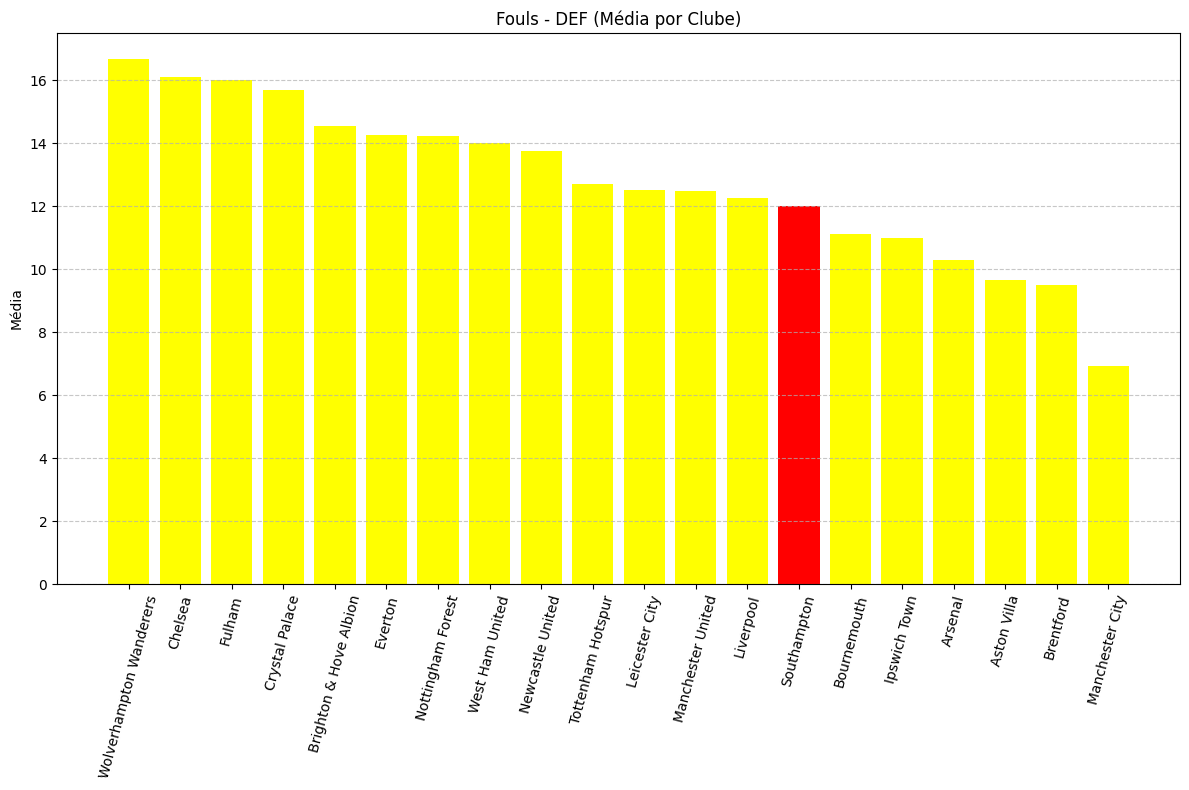

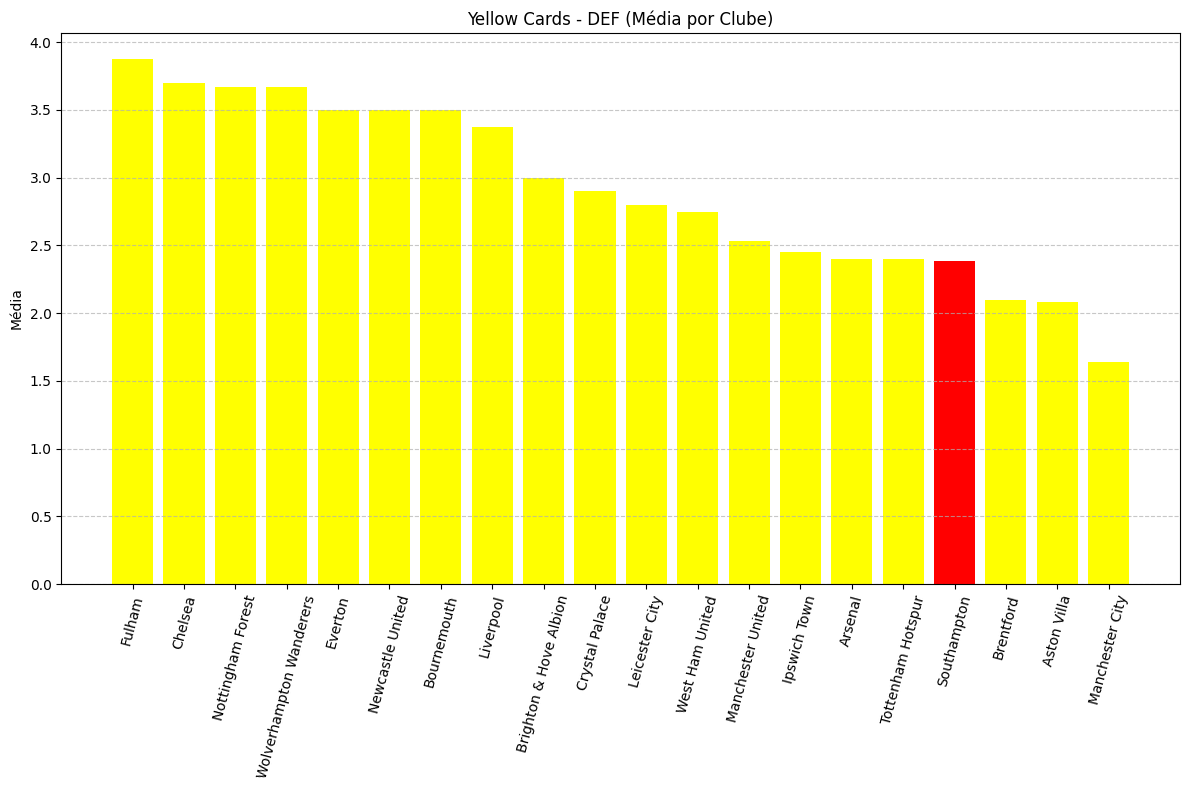

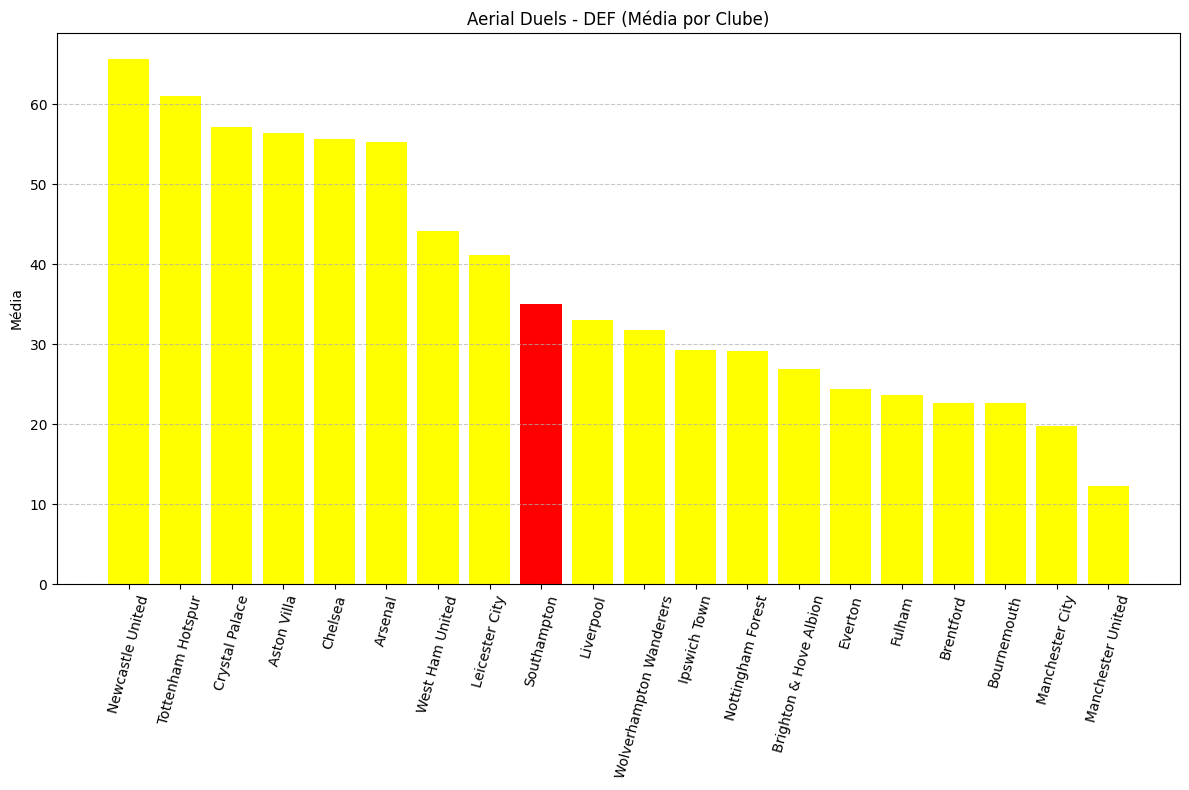

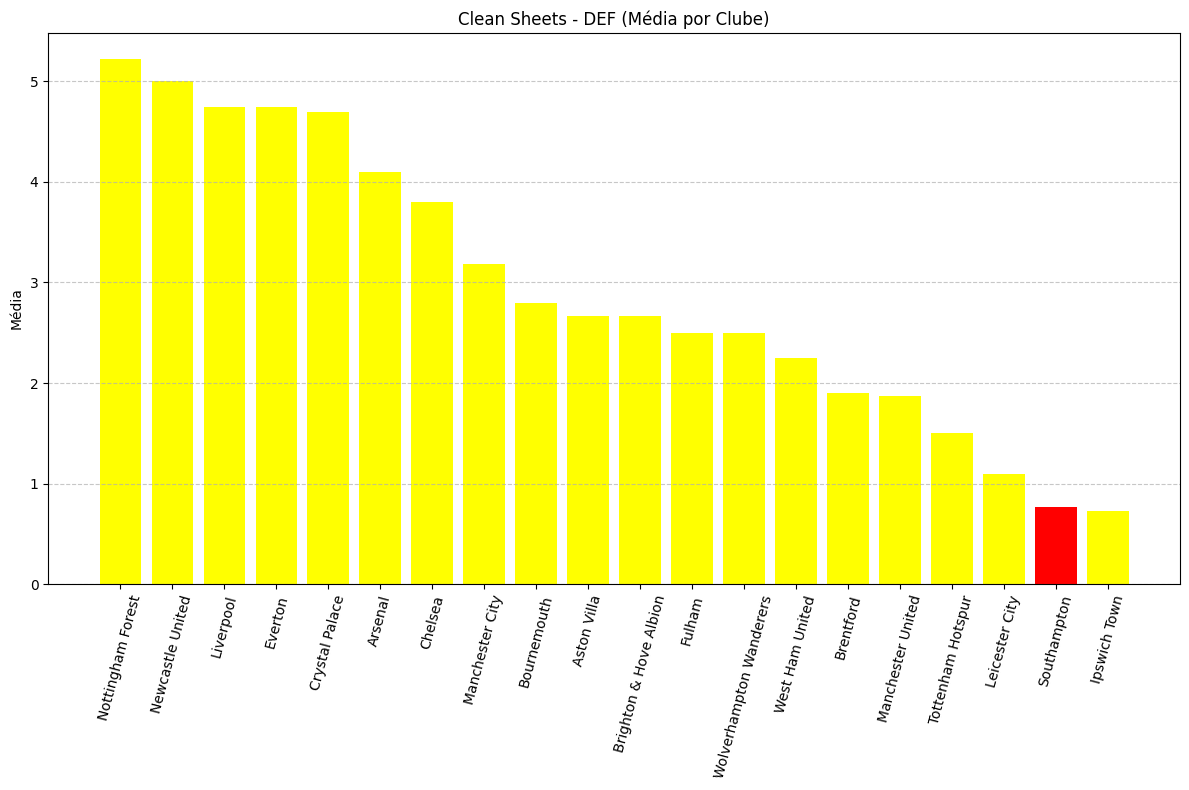

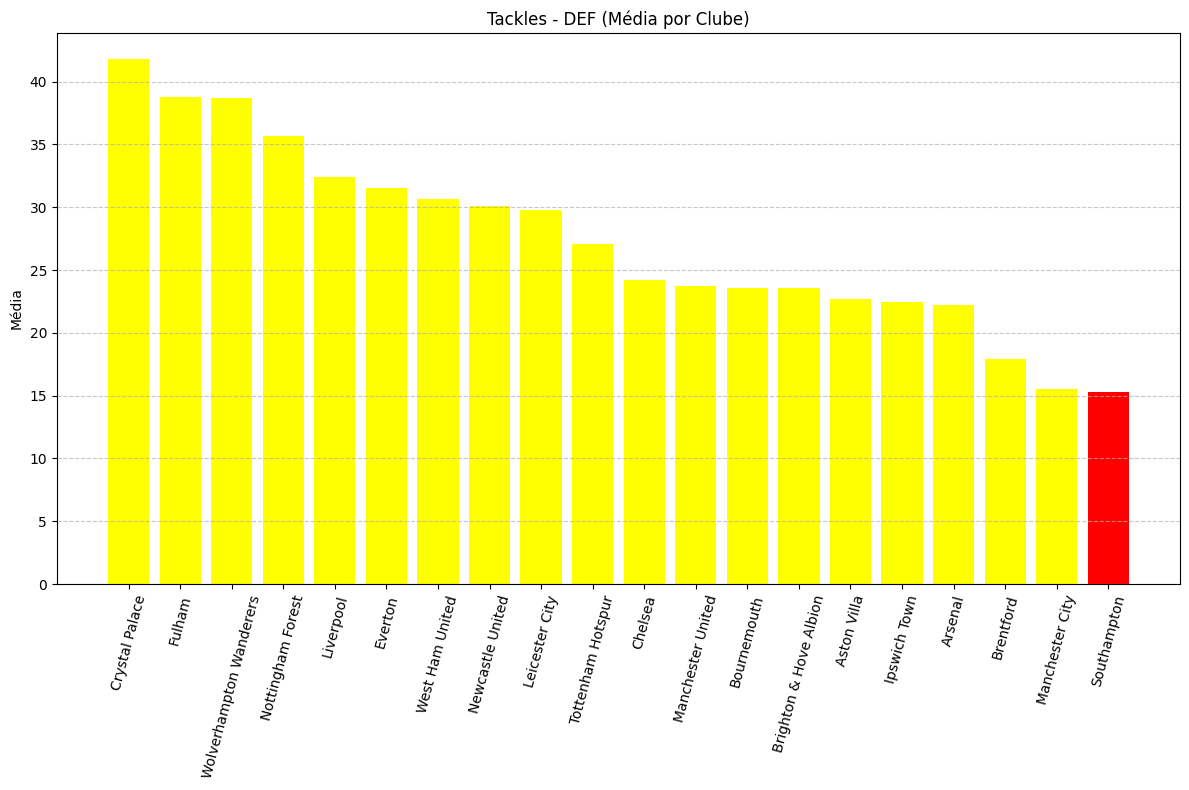

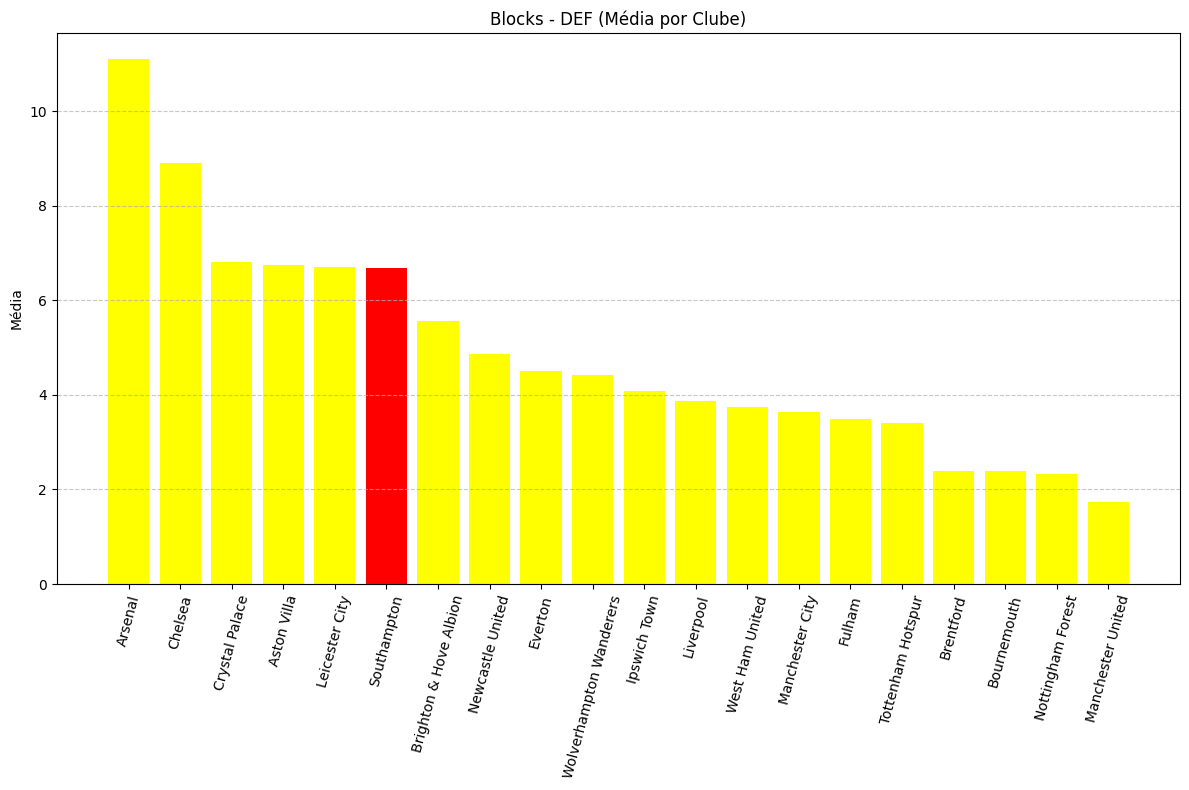

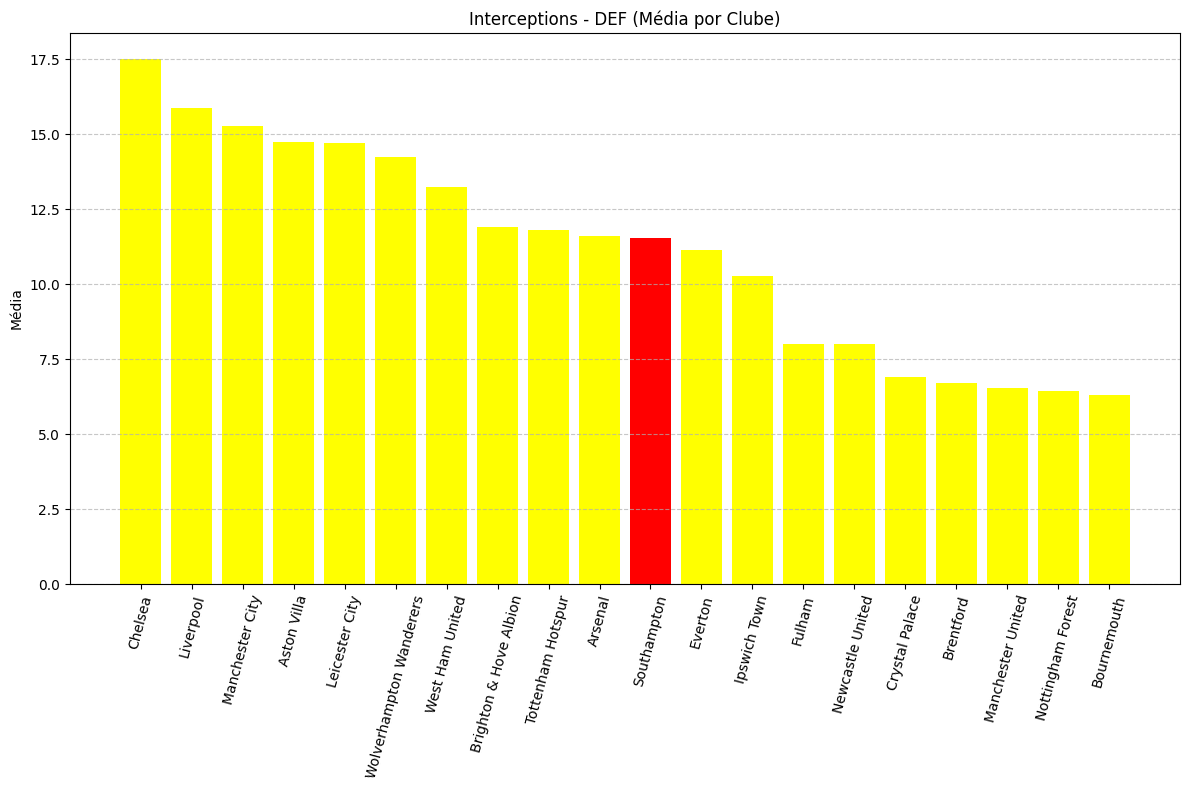

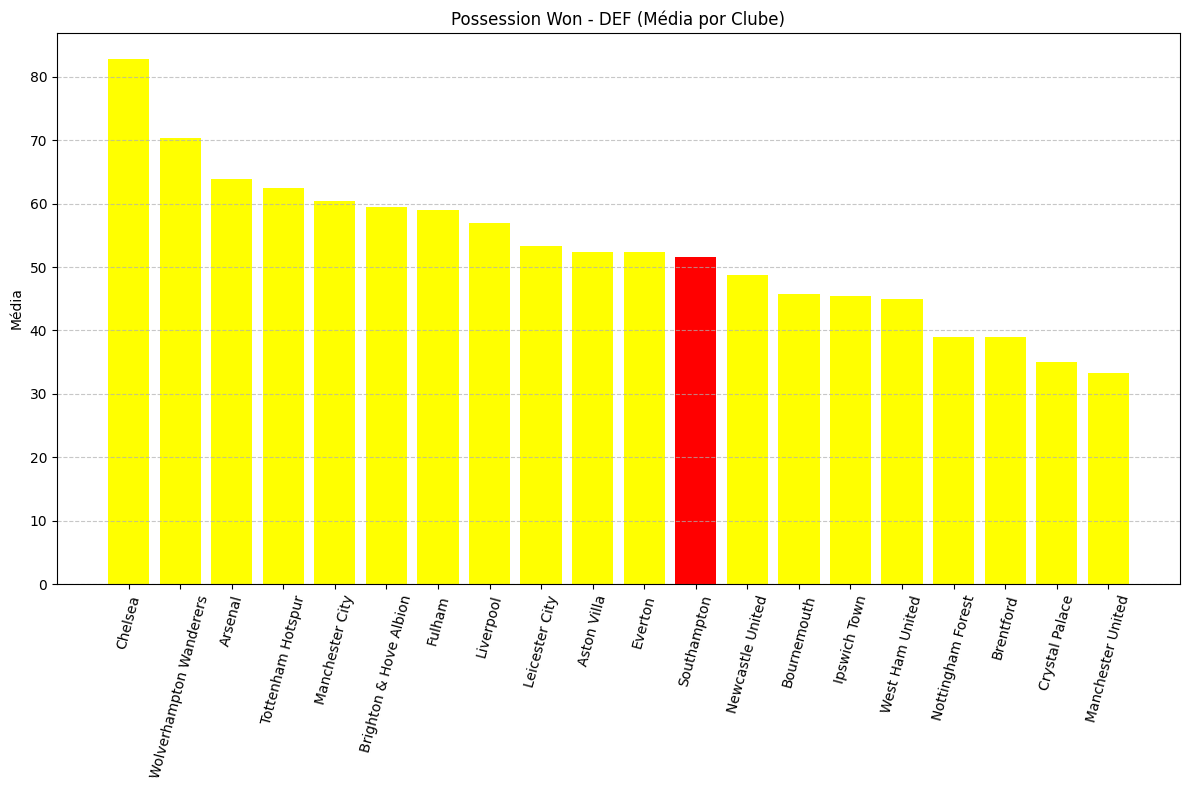

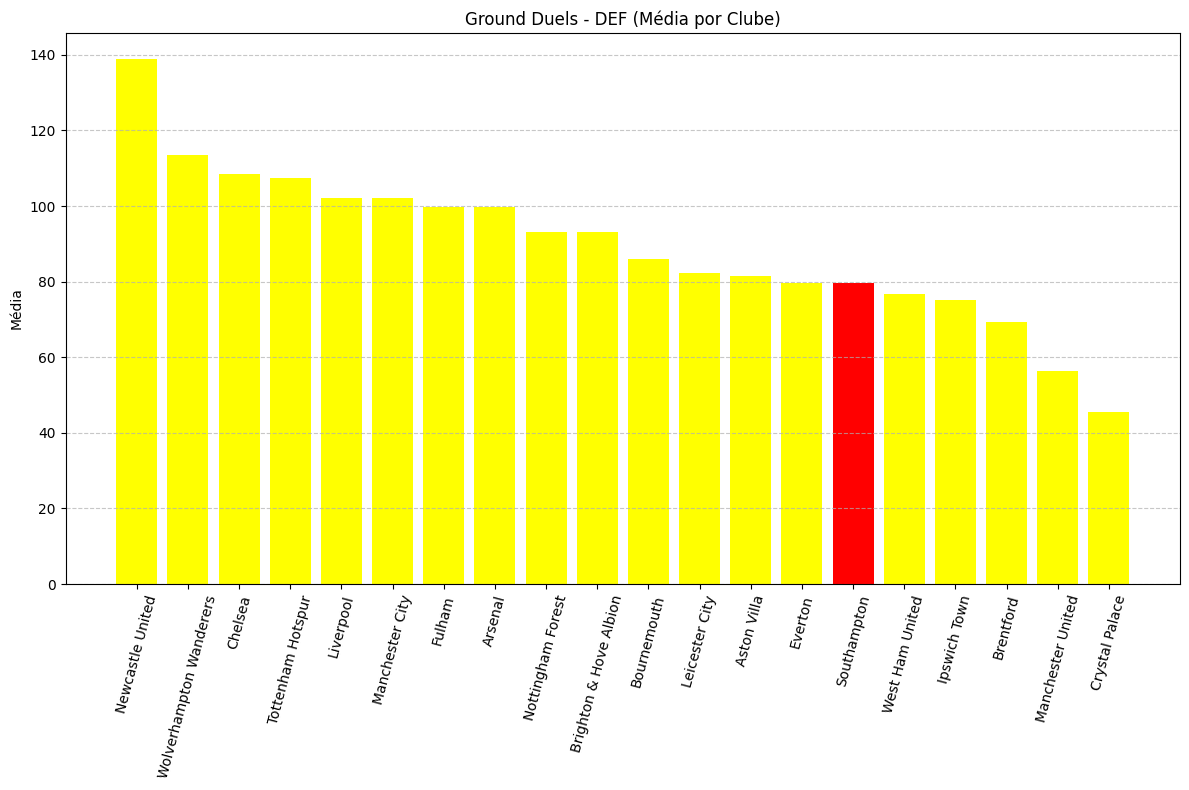

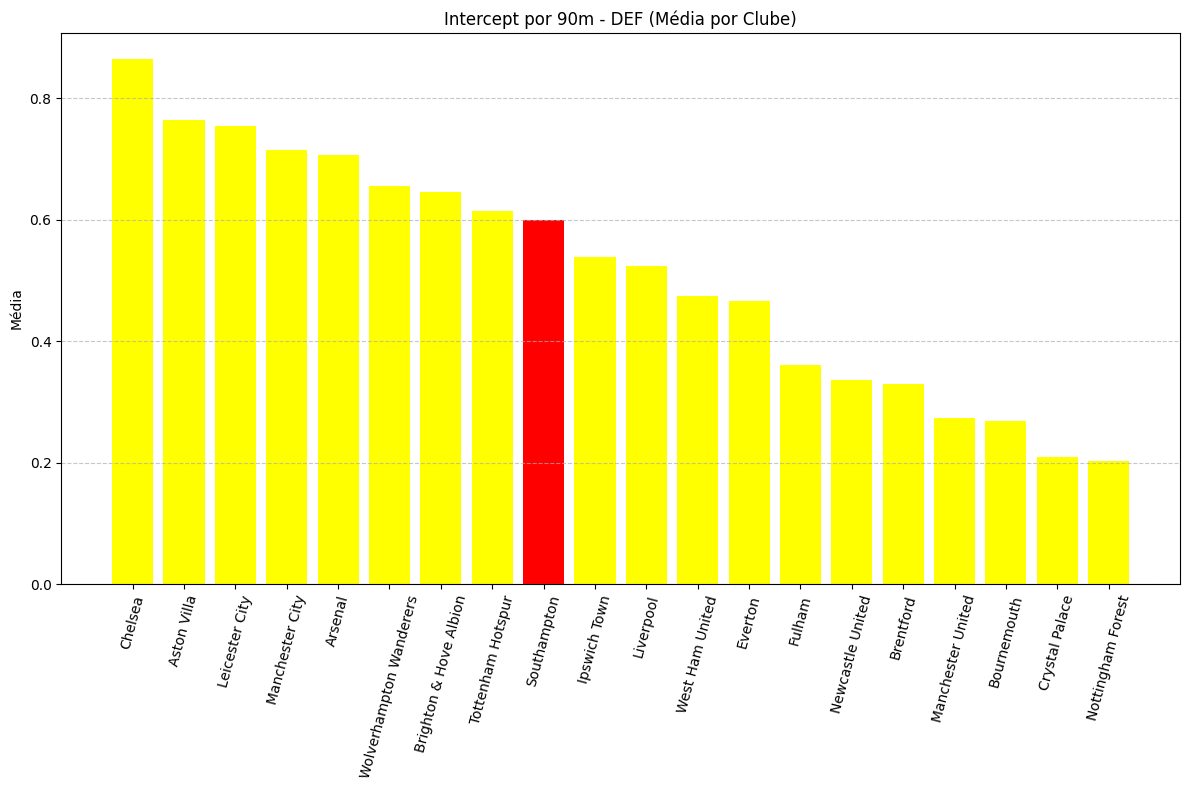

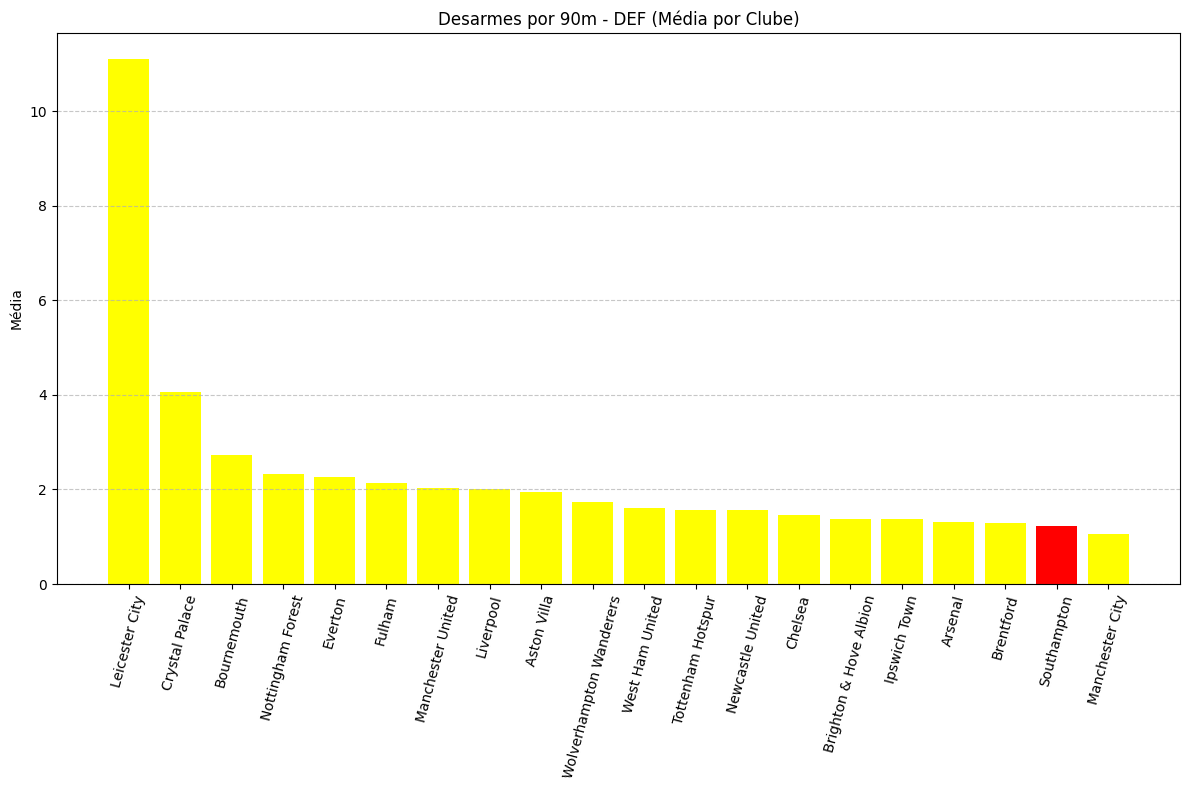

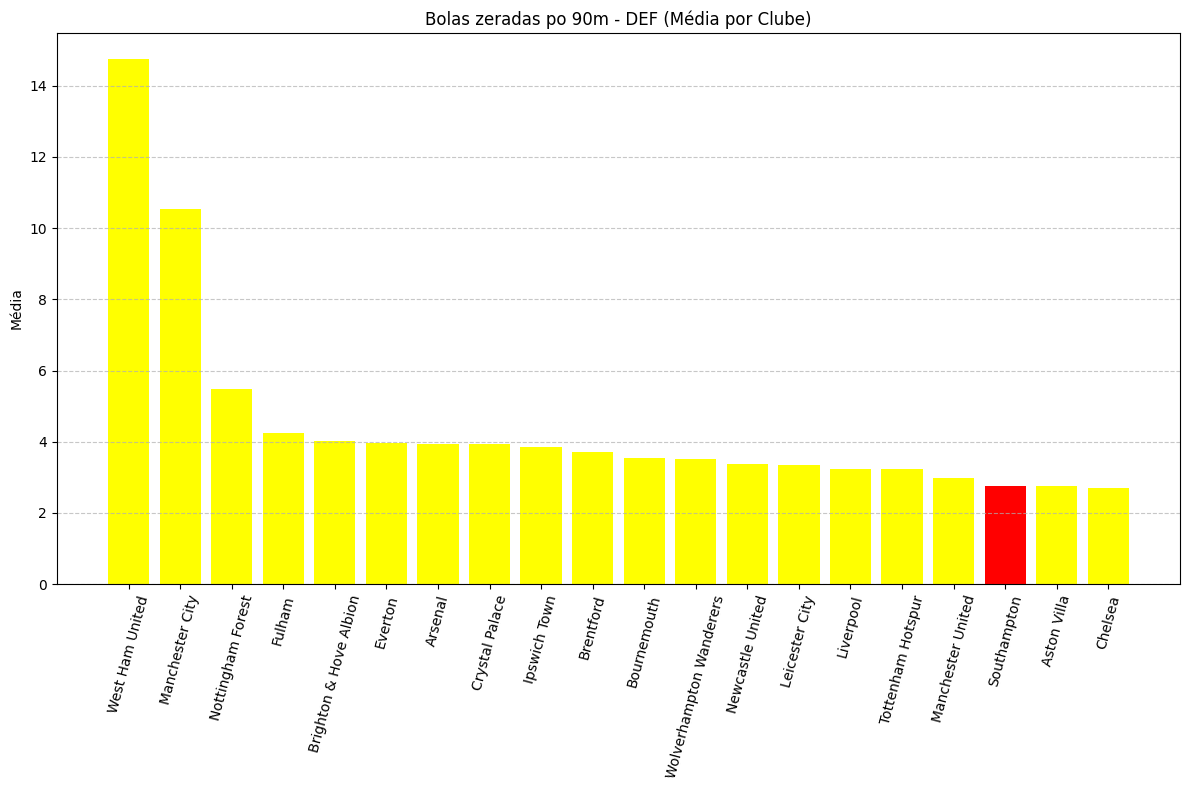

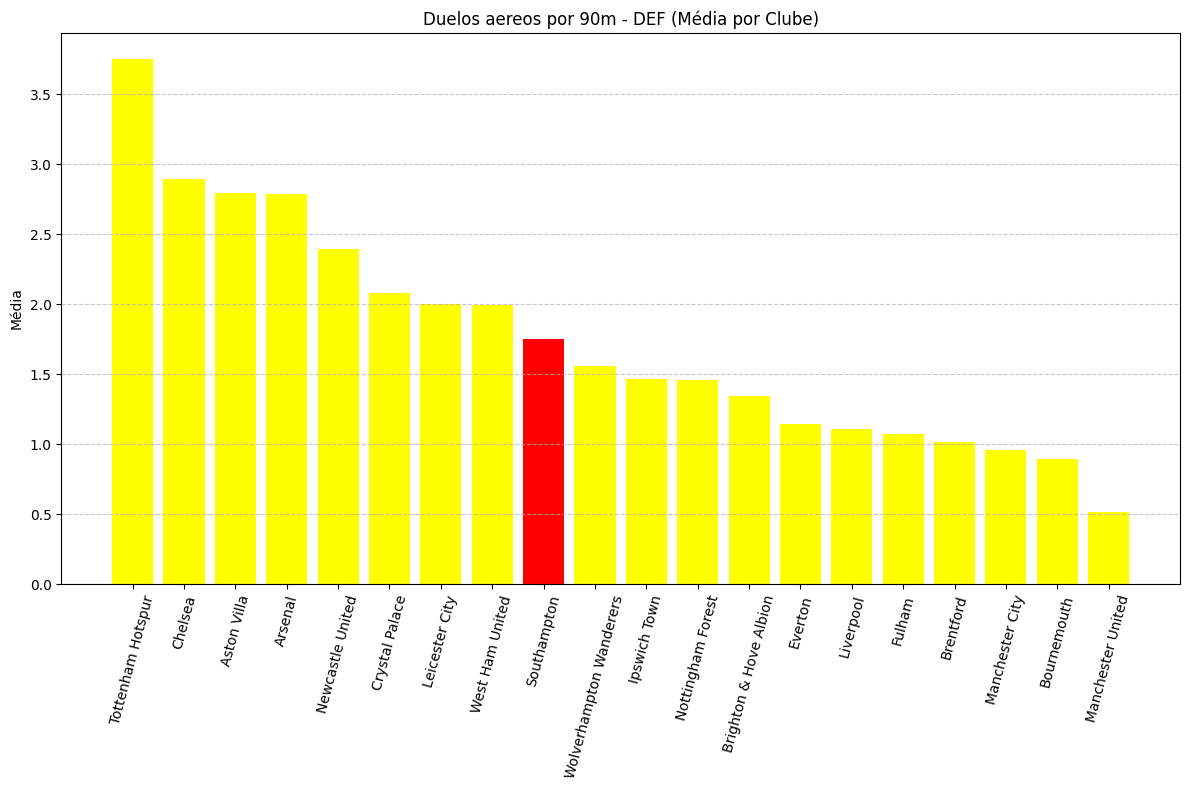

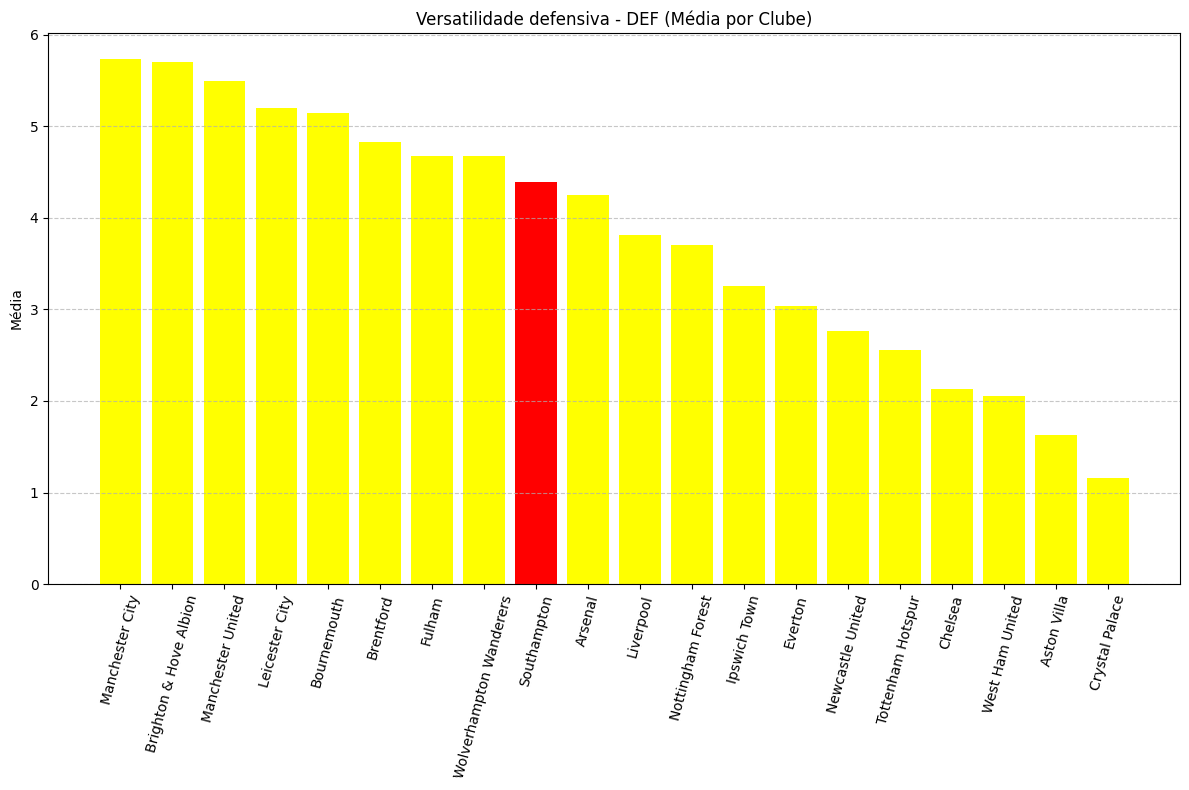

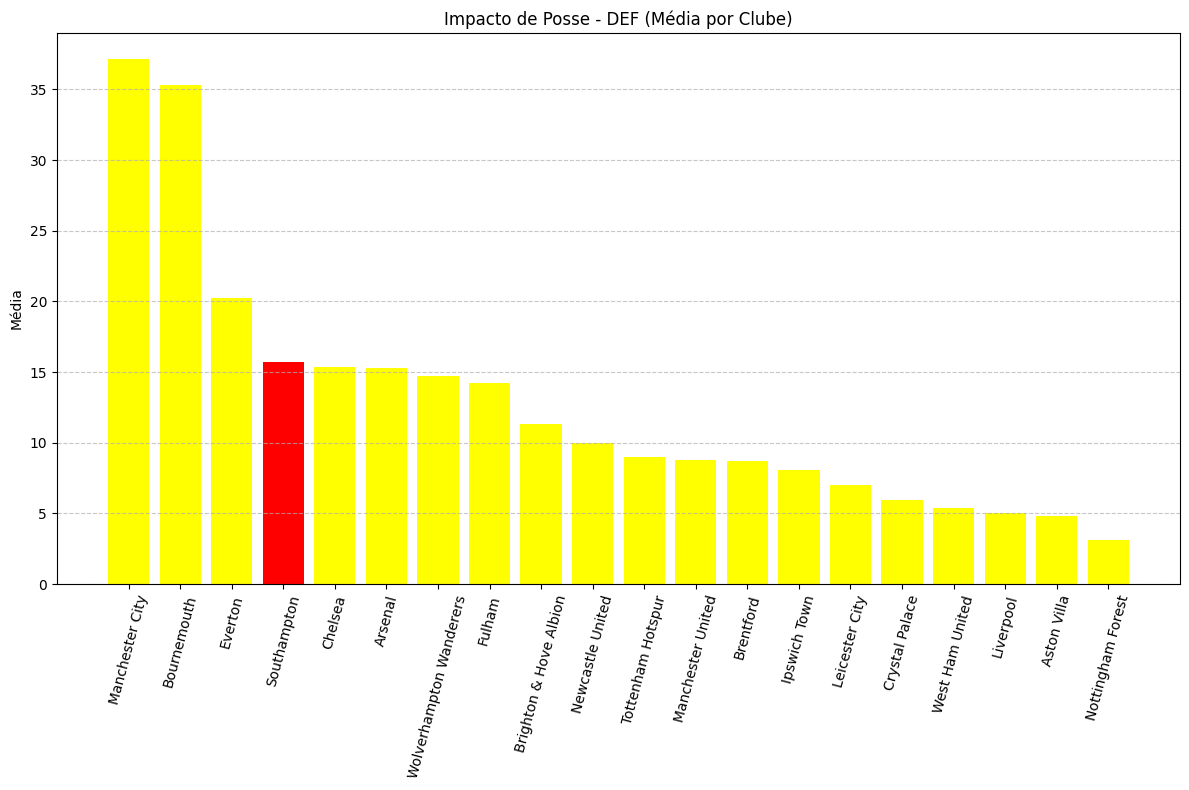

In [3]:
def dados_defensores_em_grafico(df, metricas=None):
    if metricas is None:
        metricas = [
            "Fouls", "Yellow Cards", "Aerial Duels", "Clean Sheets", "Tackles", 
            "Blocks", "Interceptions", "Possession Won", "Ground Duels",
            'Intercept por 90m', 'Desarmes por 90m', 
            'Bolas zeradas po 90m', 'Duelos aereos por 90m', 'Versatilidade defensiva',
            'Impacto de Posse'
        ]

    # Filtrando apenas defensores
    defensores = df[df['Position'] == 'DEF'].copy()

    # Garantindo que as métricas sejam numéricas
    for metrica in metricas:
        defensores[metrica] = pd.to_numeric(defensores[metrica], errors='coerce')

    # Agrupando por clube e tirando a média das métricas
    media_defensores = defensores.groupby("Club")[metricas].mean()

    # Gerando os gráficos
    for metrica in metricas:
        plt.figure(figsize=(12, 8))
        clubes_agrupados = media_defensores[metrica].sort_values(ascending=False)
        
        # Cor diferente para Southampton
        cor_southampton = ['red' if clube == 'Southampton' else 'yellow' for clube in clubes_agrupados.index]
        
        plt.bar(clubes_agrupados.index, clubes_agrupados.values, color=cor_southampton)
        plt.title(f"{metrica} - DEF (Média por Clube)")
        plt.xticks(rotation=75)
        plt.ylabel("Média")
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

dados_defensores_em_grafico(df)

TypeError: unhashable type: 'numpy.ndarray'

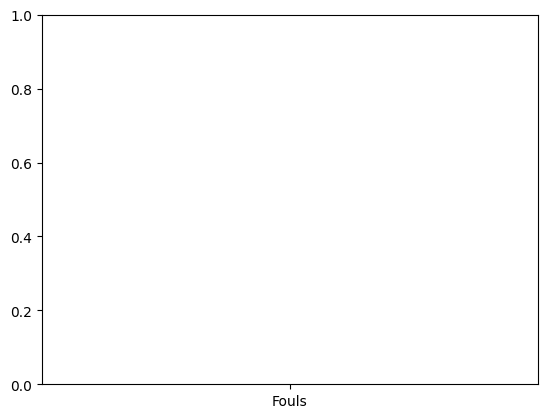

In [4]:
def dados_meias(df_pl, df_southampton, metricas=None):
    colunas_percentuais = ['Passes%', 'Crosses %', 'fThird Passes %']

    # Função para converter colunas percentuais
    def converter_percentual(df, col):
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce') / 100
        return df

    # Aplica conversão
    for col in colunas_percentuais:
        df_pl = converter_percentual(df_pl, col)
        df_southampton = converter_percentual(df_southampton, col)
    
    
    if metricas is None:
        metricas = [
            'Assists', 'Passes', 'Successful Passes', 'Passes%', 
            'Crosses', 'Successful Crosses', 'Crosses %', 'fThird Passes',
            'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
            'Progressive Carries', 'Quebra de linha por 90m', 
            'Passes por 90m', 'Condução ao ataque por 90m', 
            'Condução por 90m', 'Assistencias por 90m', 'Conduções que geraram assistencia por 90m',
            'Eficacia com a bola'
        ]
        
    meias_liga = df_pl[df_pl["Position"] == "MID"].fillna(0)
    meias_southampton = df_southampton[df_southampton["Position"] == 'MID'].fillna(0)

    print(" ========== Comparativo da Liga com a equipe do southampton ==========")

    for metrica in metricas:
        media_meias_liga = meias_liga[metrica].mean()
        media_meias_southampton = meias_southampton[metrica].mean()
        print(f"Dados do southampton: {metrica} {media_meias_southampton:.2f} | Dados da Liga: {metrica} {media_meias_liga:.2f}")
        print("-" * 90)

    return metricas

metricas_meias = dados_meias(df_pl, df_southampton)
arquivo_meias = "metricas_meias.txt"
with open(arquivo_meias, "w", encoding="utf-8") as arquivo:
    arquivo.write("\n".join(metricas_meias))

print(f"Salvo em '{arquivo_meias}'")

 ========== Comparativo da Liga com a equipe do southampton ==========
Dados do southampton: Assists 0.55 | Dados da Liga: Assists 1.98
------------------------------------------------------------------------------------------
Dados do southampton: Passes 595.00 | Dados da Liga: Passes 588.82
------------------------------------------------------------------------------------------
Dados do southampton: Successful Passes 515.00 | Dados da Liga: Successful Passes 497.33
------------------------------------------------------------------------------------------
Dados do southampton: Passes% 0.38 | Dados da Liga: Passes% 0.52
------------------------------------------------------------------------------------------
Dados do southampton: Crosses 17.09 | Dados da Liga: Crosses 17.92
------------------------------------------------------------------------------------------
Dados do southampton: Successful Crosses 2.82 | Dados da Liga: Successful Crosses 3.89
----------------------------------

C:\Users\vitor\AppData\Local\Temp\ipykernel_14312\1787344434.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('%', '', regex=False)
C:\Users\vitor\AppData\Local\Temp\ipykernel_14312\1787344434.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce') / 100
C:\Users\vitor\AppData\Local\Temp\ipykernel_14312\1787344434.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

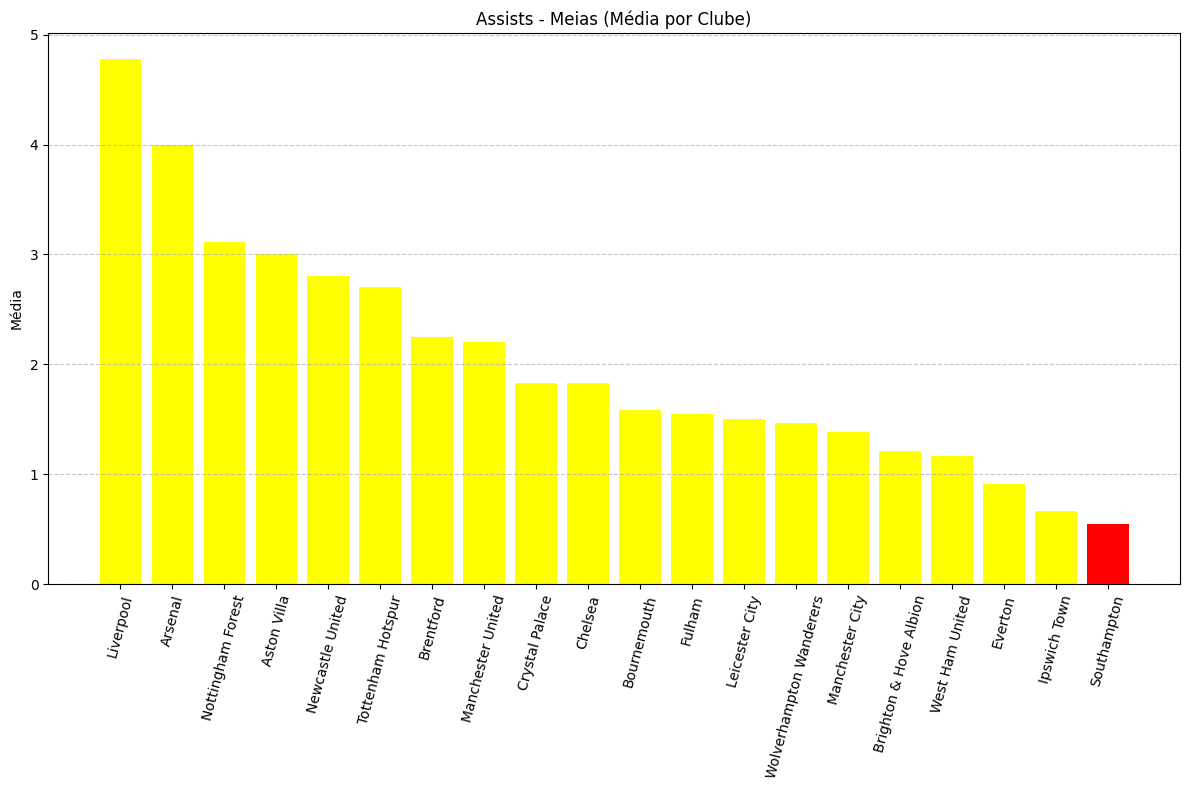

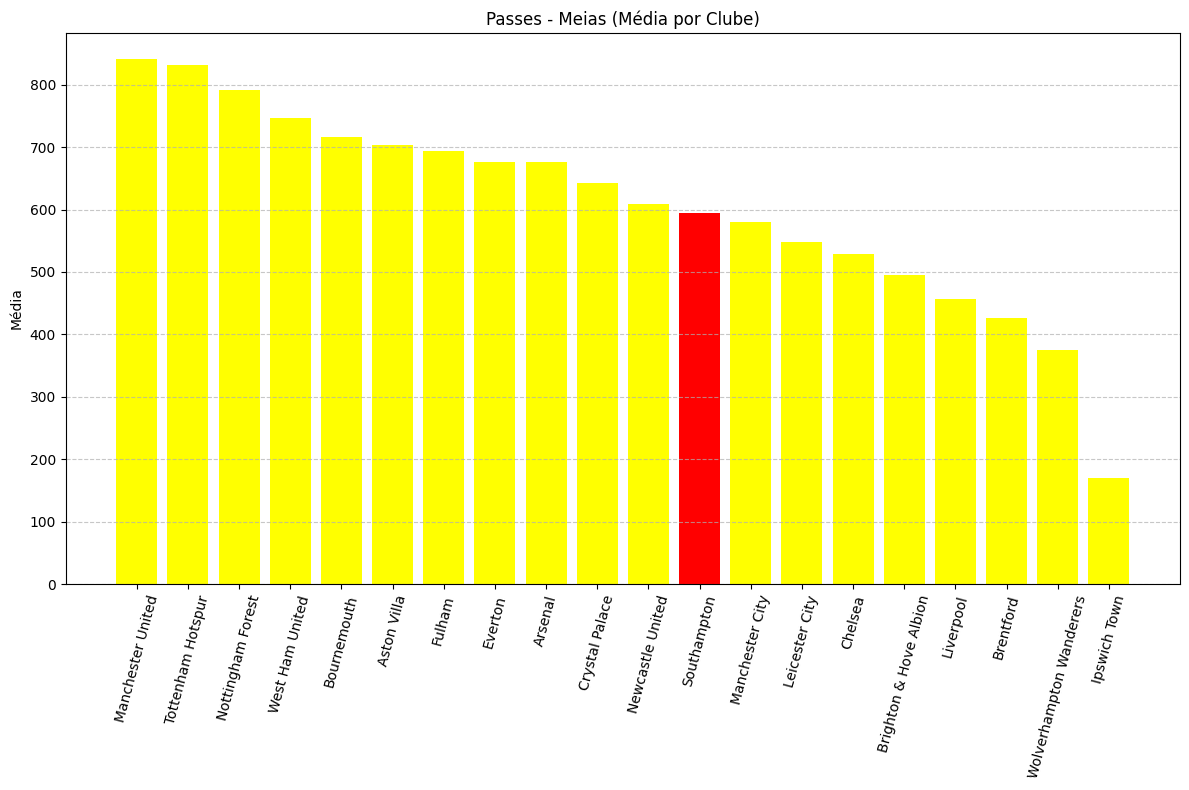

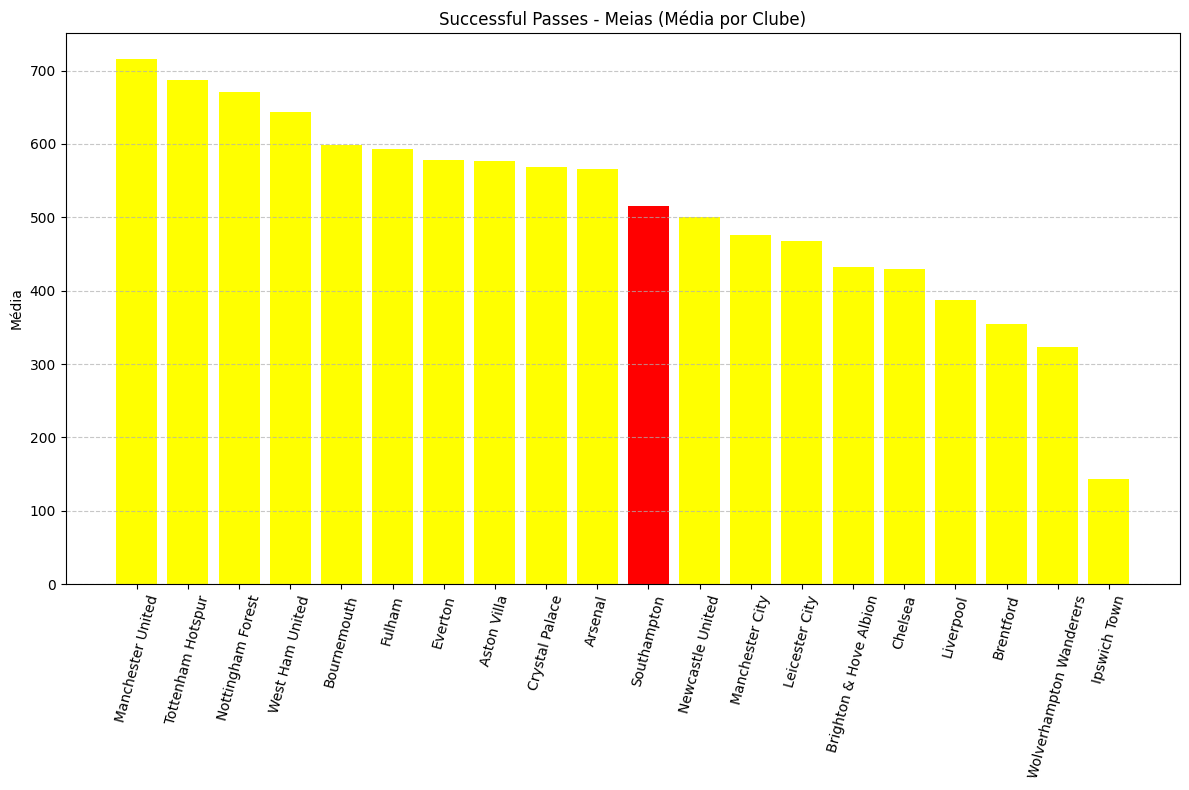

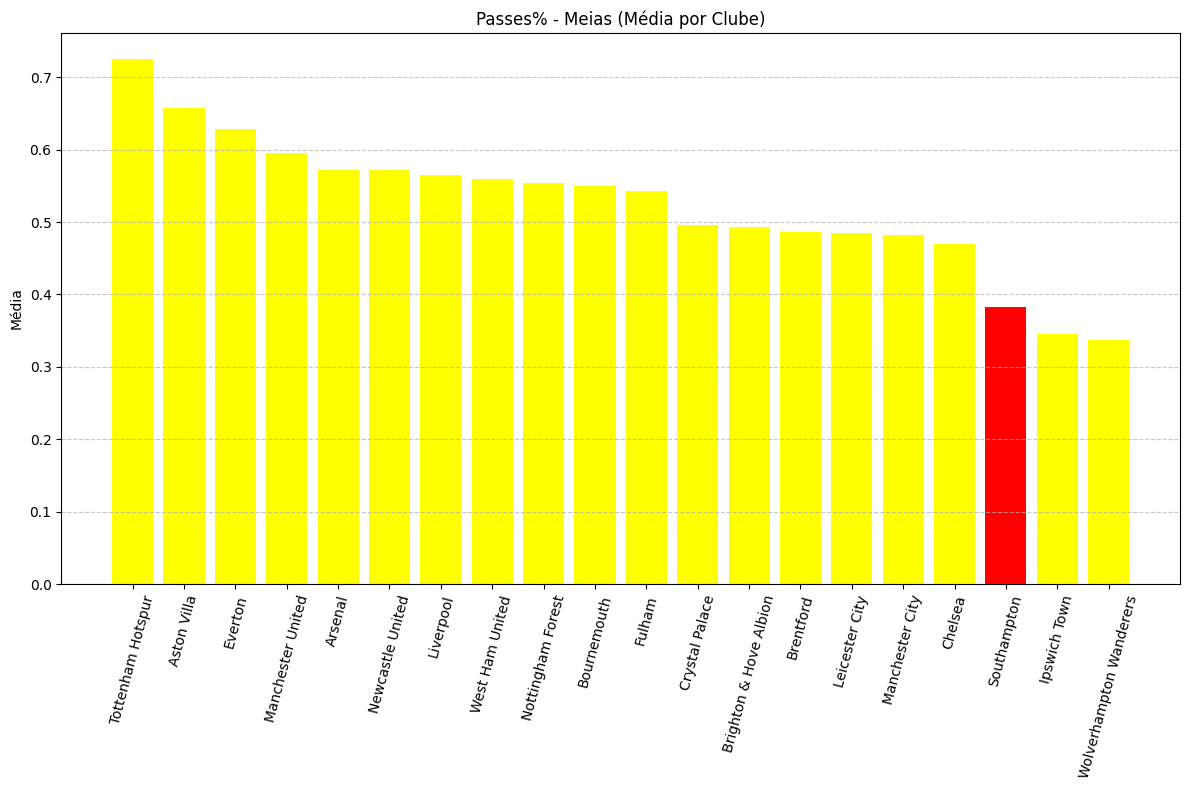

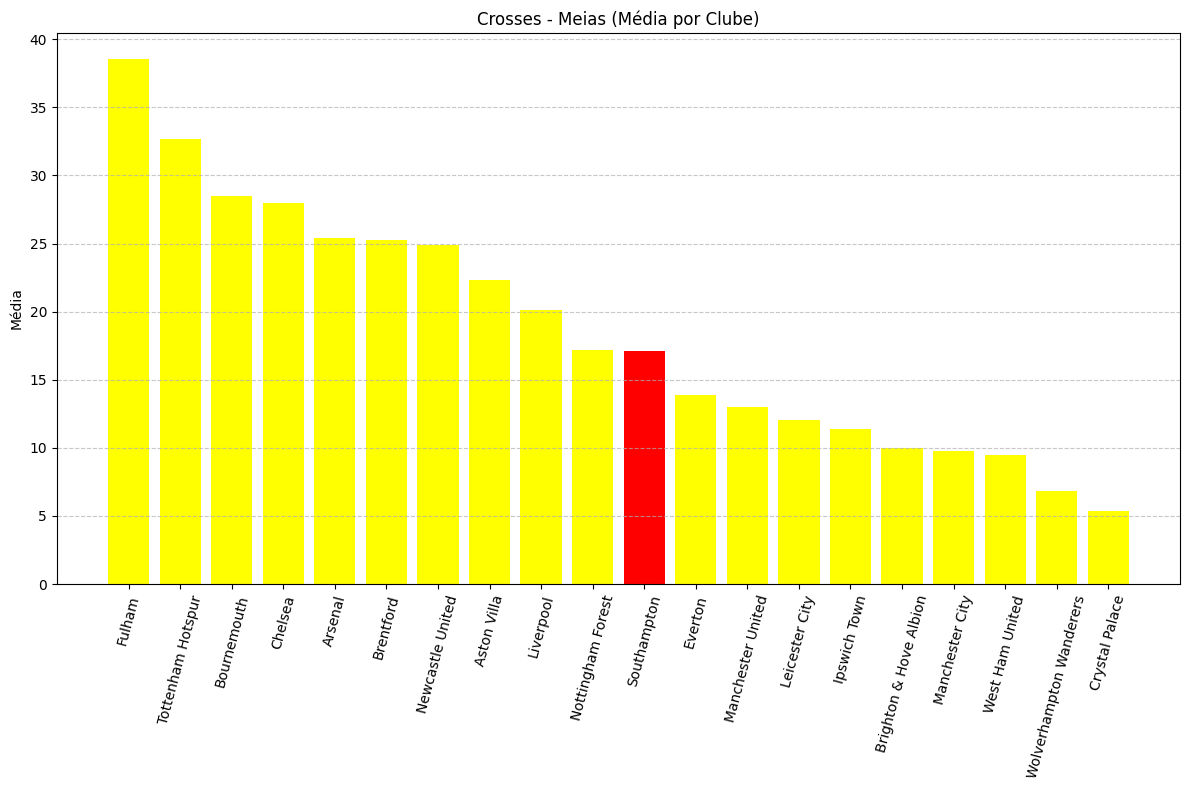

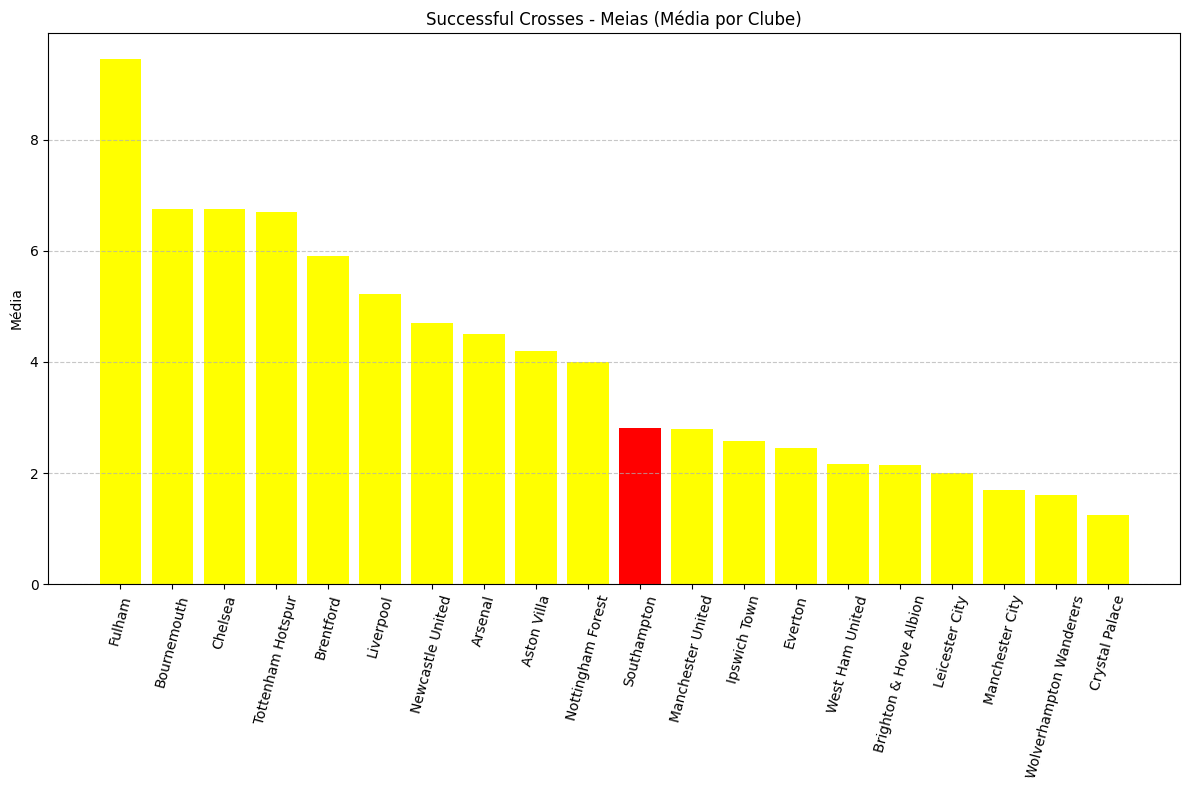

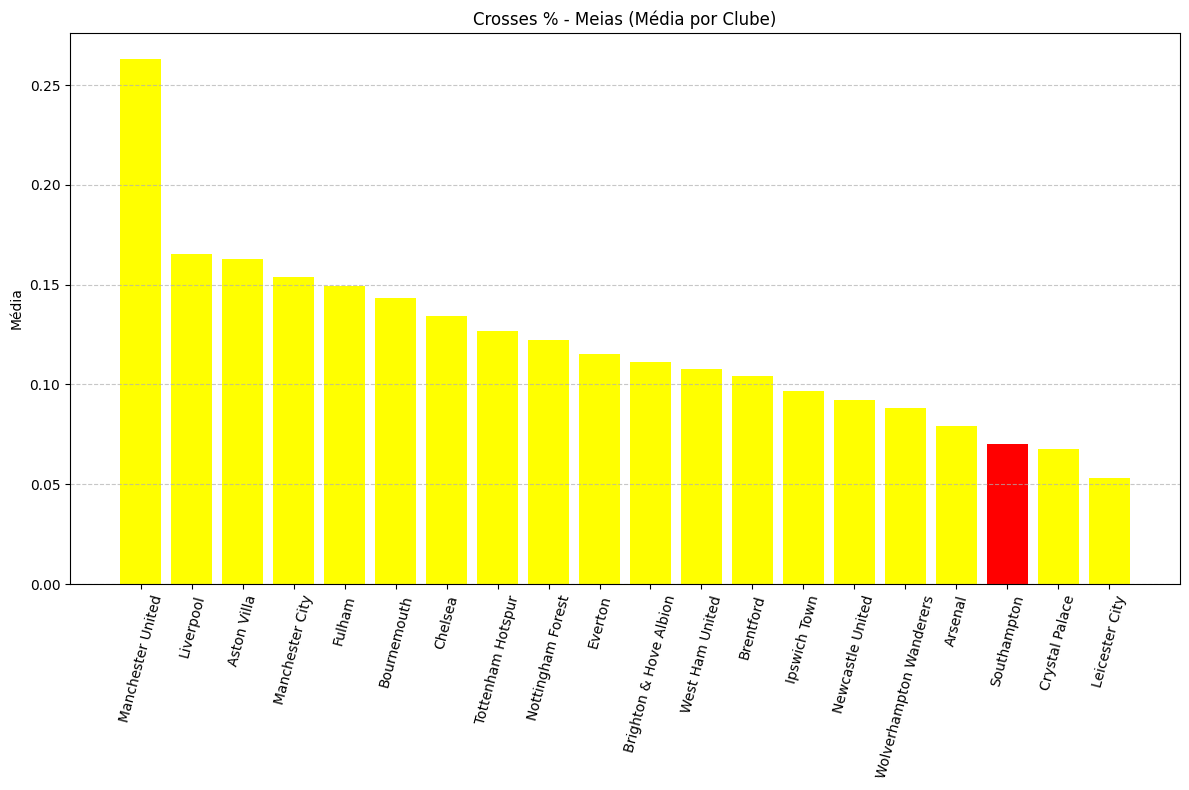

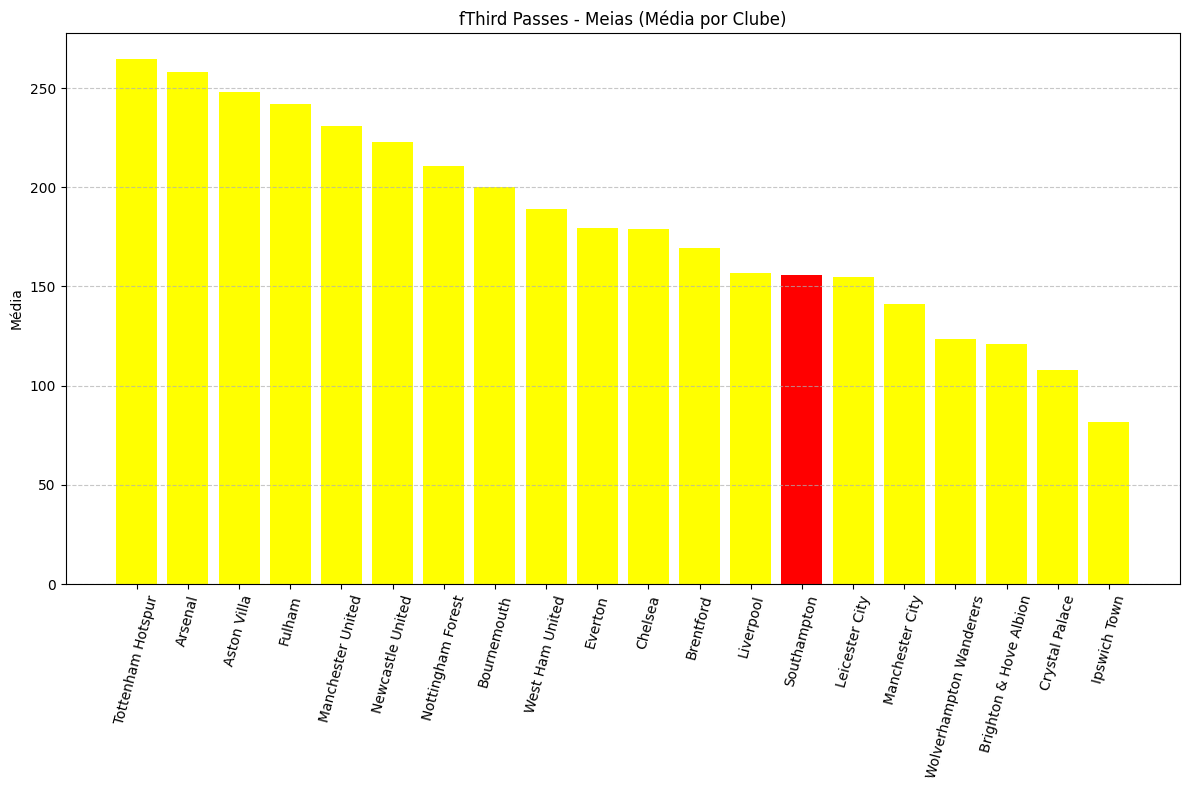

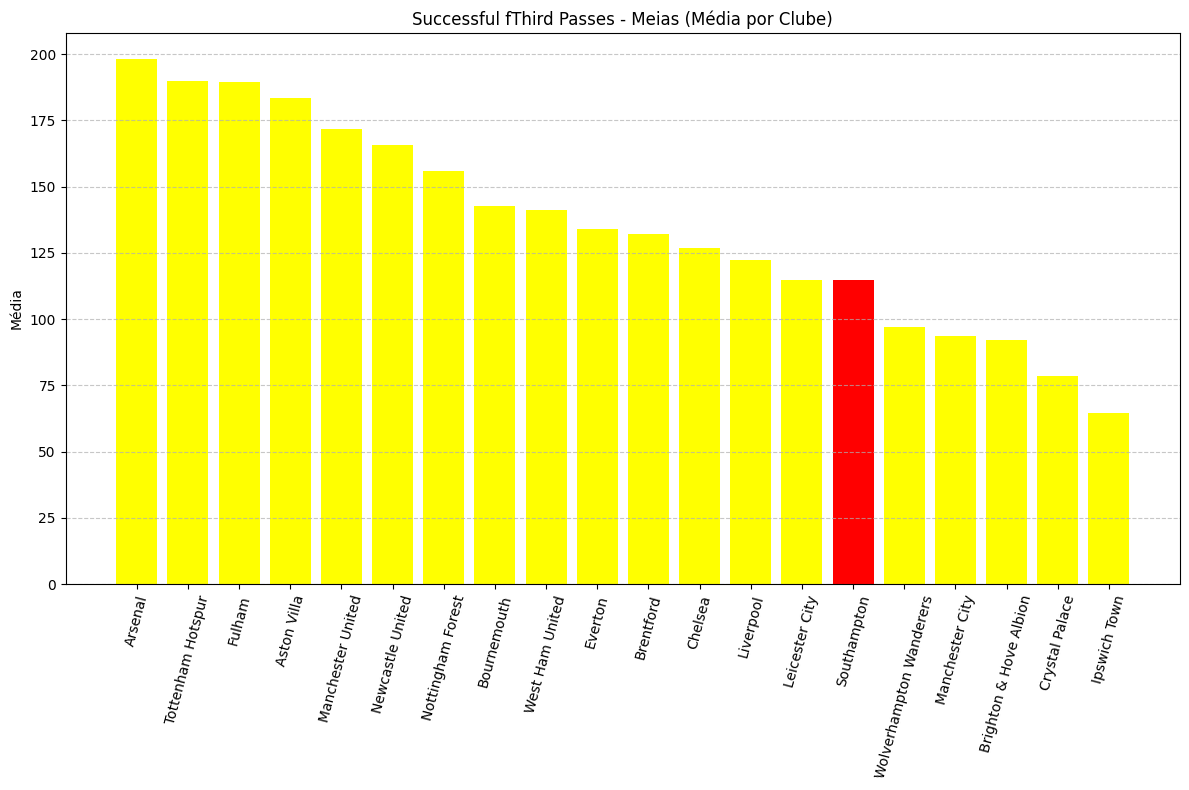

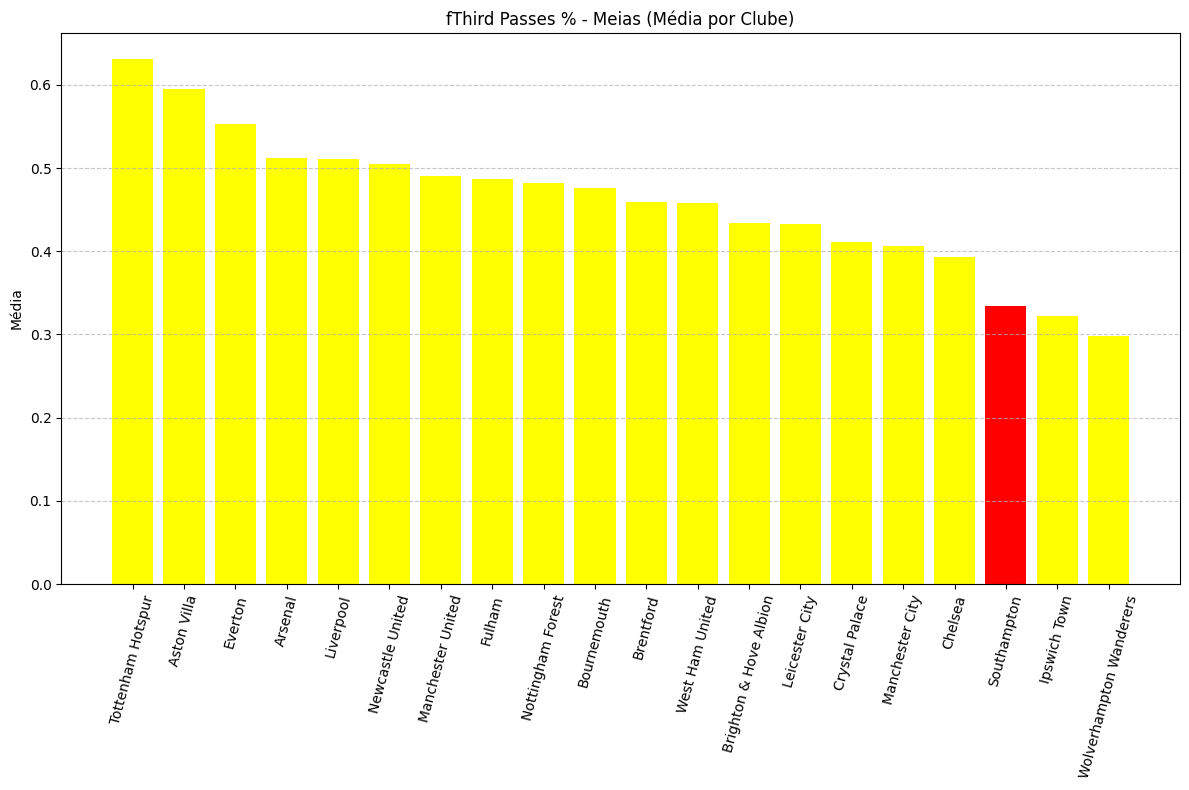

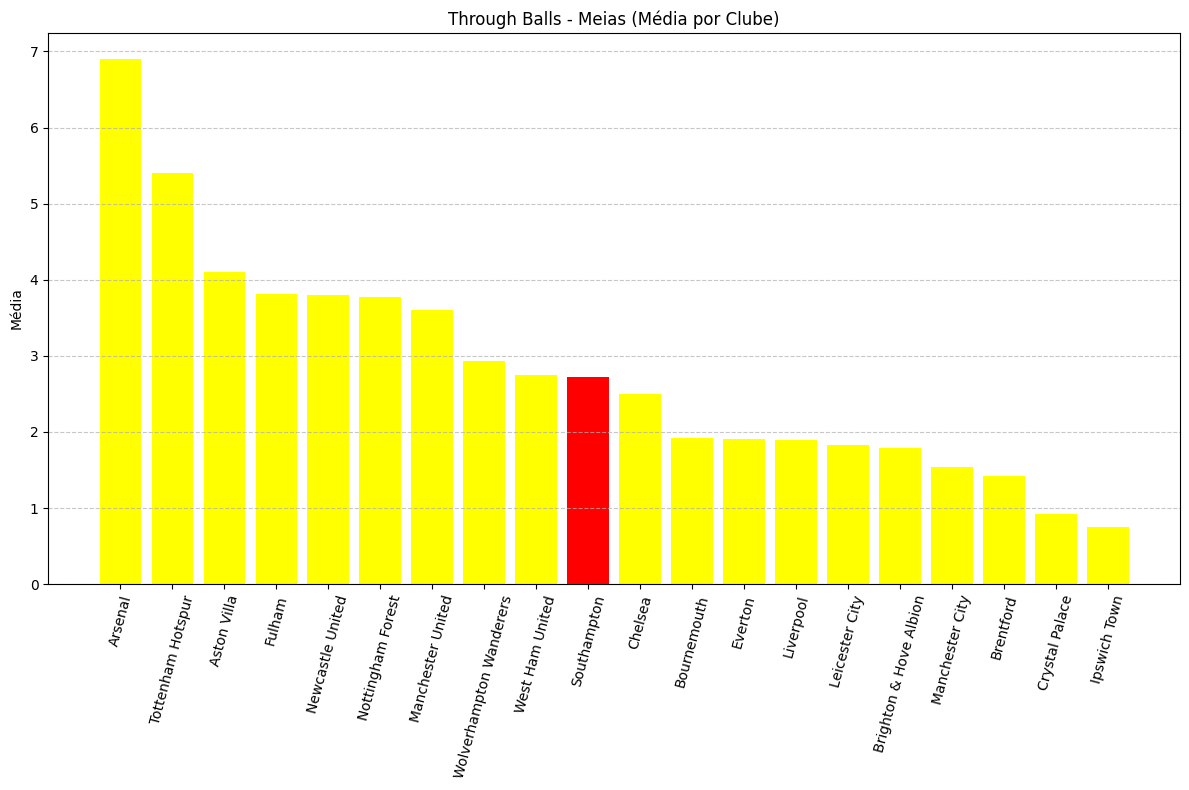

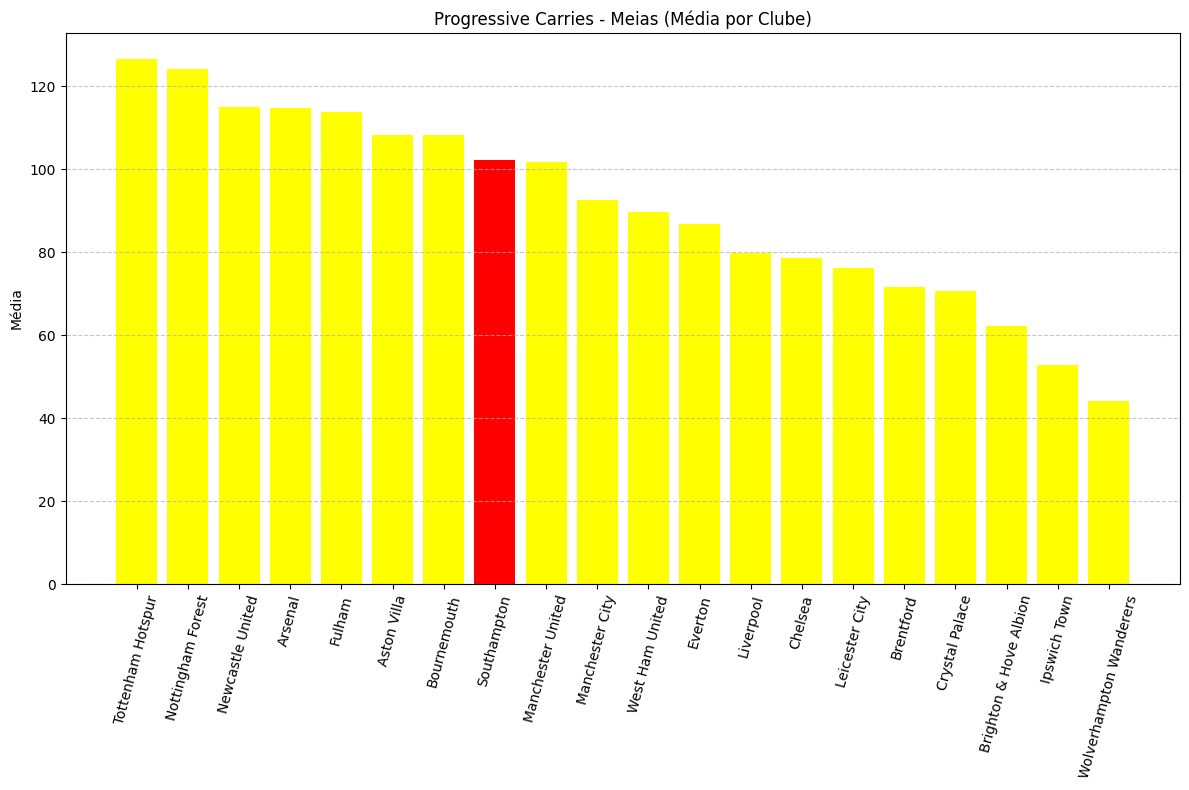

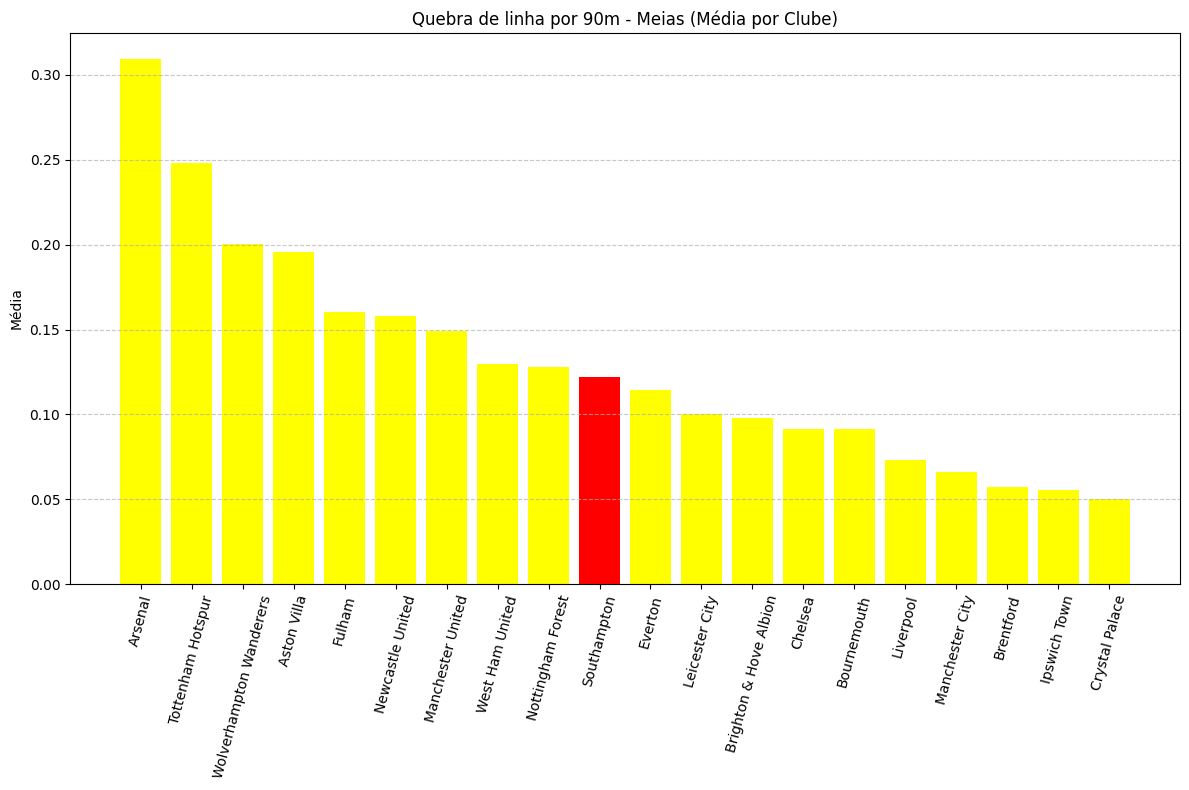

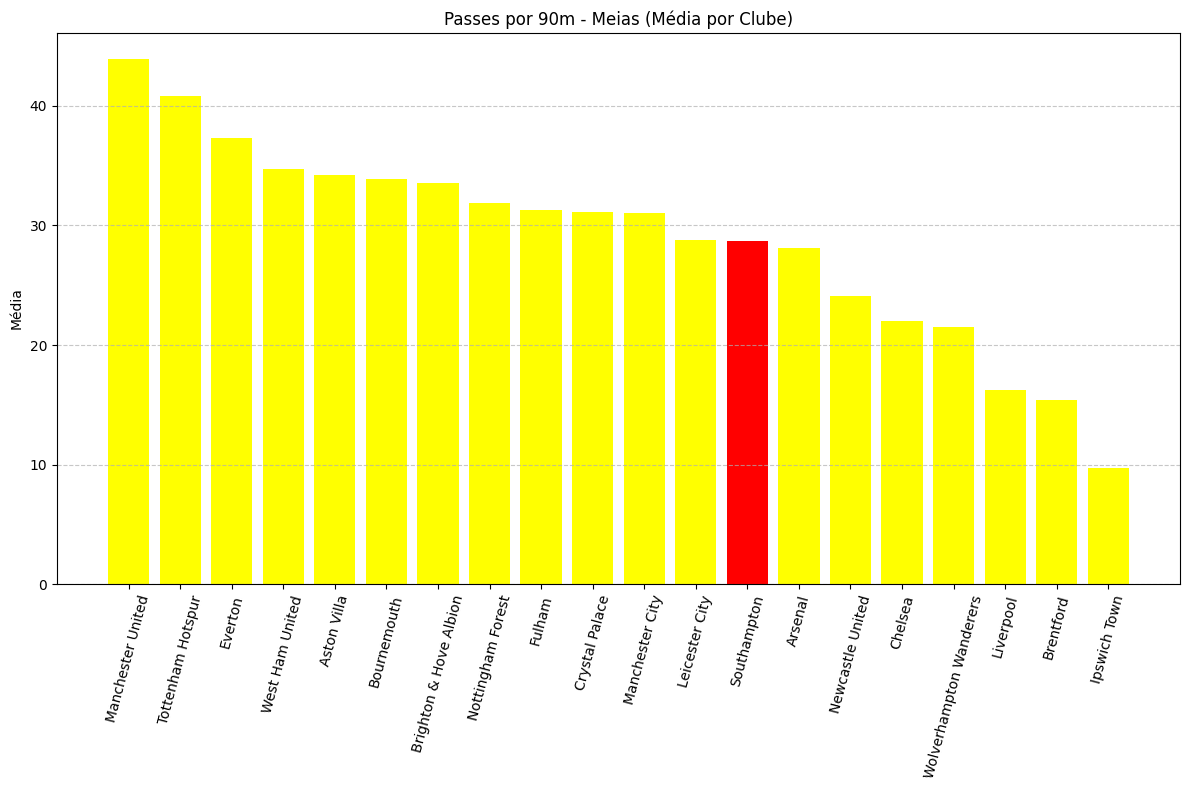

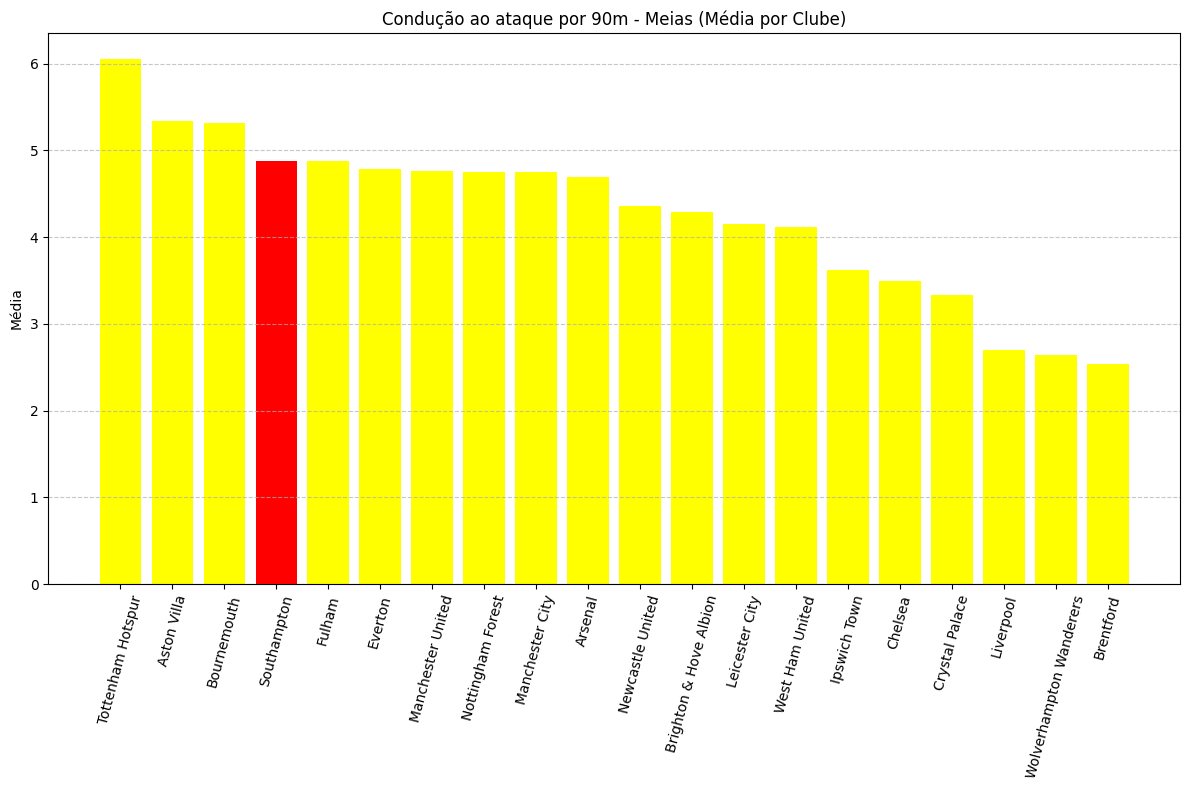

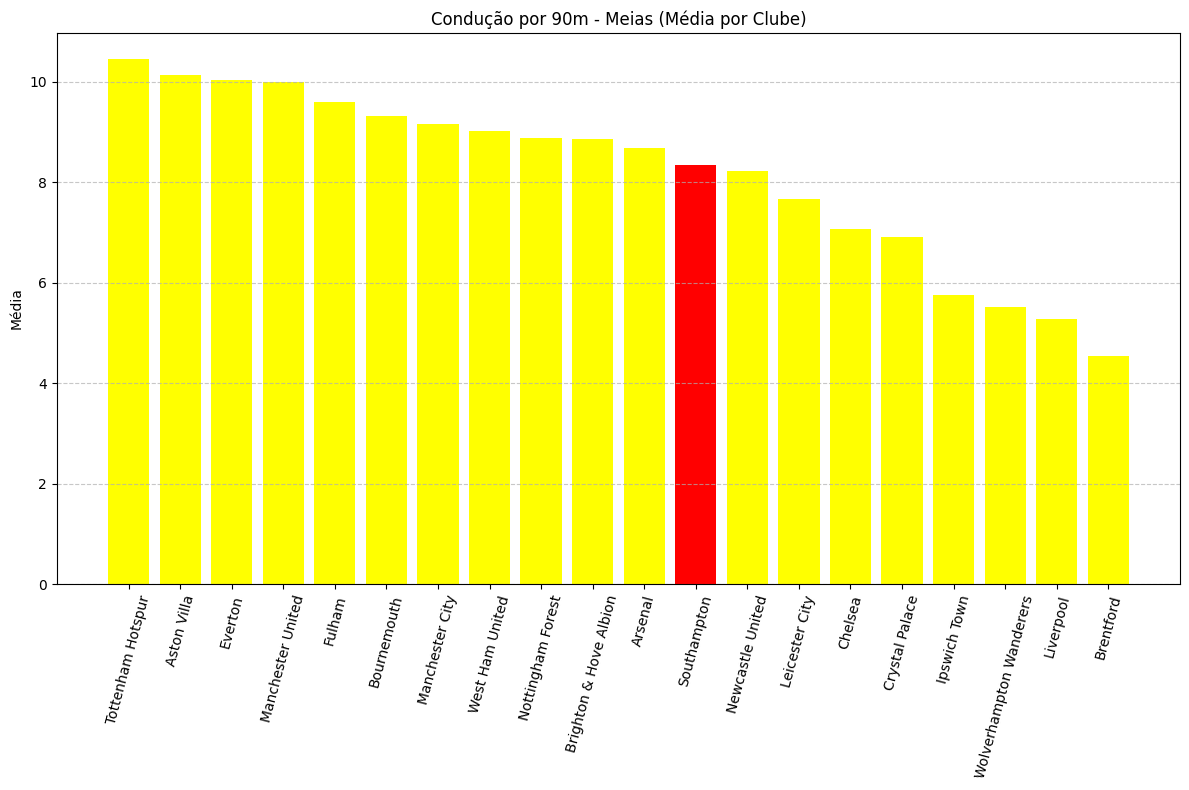

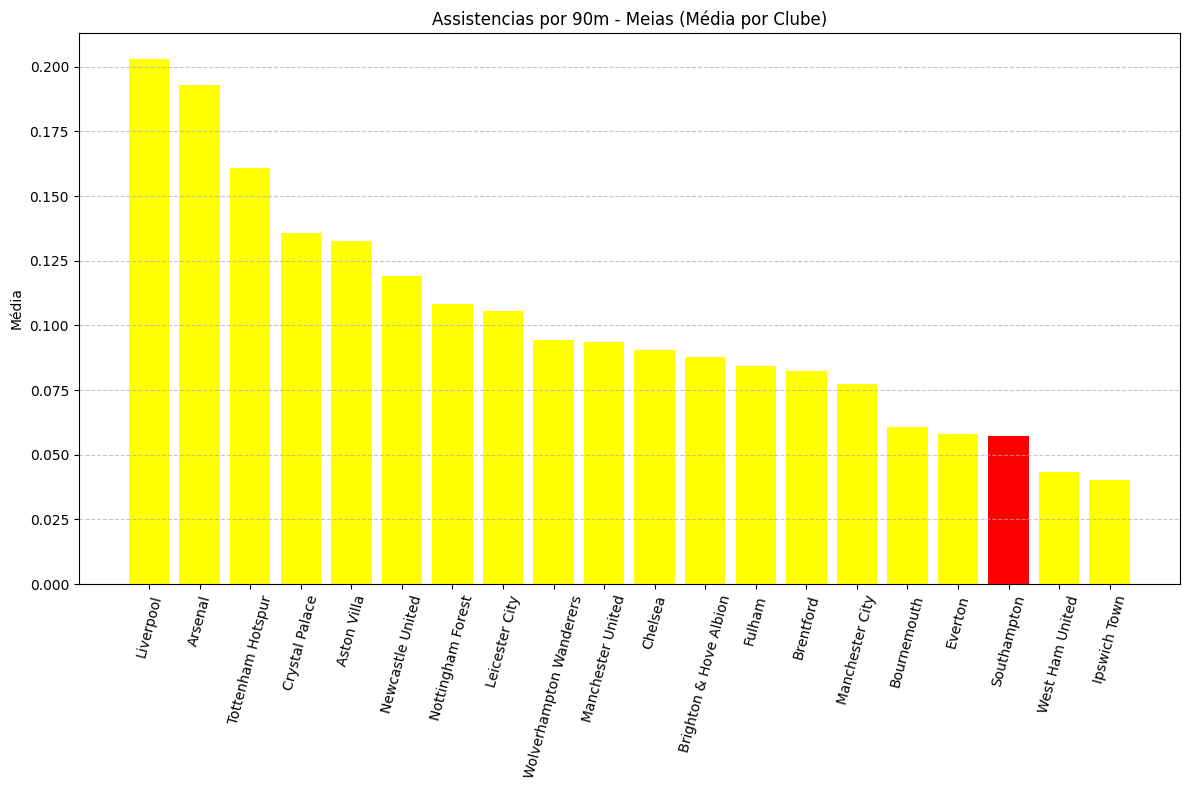

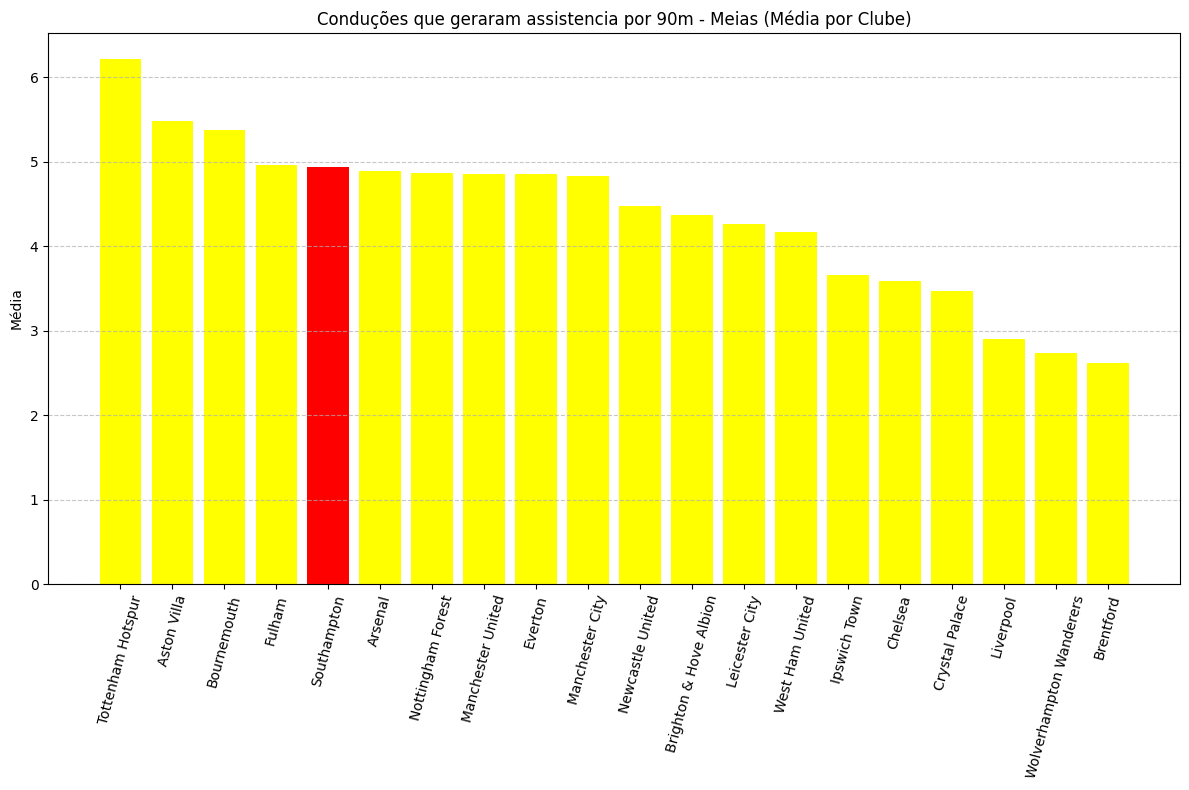

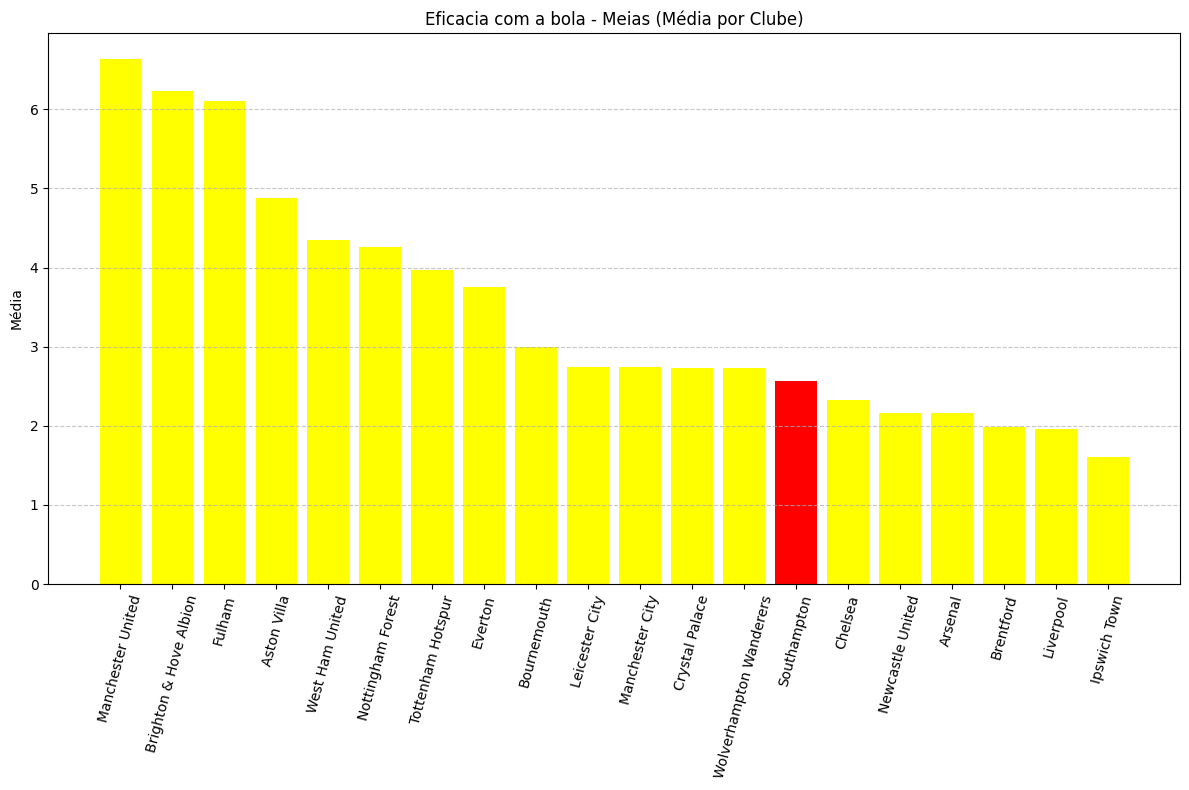

In [7]:
df = pd.read_csv("C:/Users/vitor/OneDrive/Documentos/My-projects/Southampton/Dados/DF_ALL_Teans.csv")

def dados_meias_em_grafico(df, metricas=None):

    #removendo a duplicada do brighton
    df = df[df['Club'] != 'Brighton']
    
    colunas_percentuais = ['Passes%', 'Crosses %', 'fThird Passes %']
        
        
        # Função para converter colunas percentuais
    def converter_percentual(df, col):
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce') / 100
        return df

    # Aplica conversão
    for col in colunas_percentuais:
        df = converter_percentual(df, col)
    
    if metricas is None:
        metricas = [
            'Assists', 'Passes', 'Successful Passes', 'Passes%', 
            'Crosses', 'Successful Crosses', 'Crosses %', 'fThird Passes',
            'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
            'Progressive Carries', 'Quebra de linha por 90m', 
            'Passes por 90m', 'Condução ao ataque por 90m', 
            'Condução por 90m', 'Assistencias por 90m', 
            'Conduções que geraram assistencia por 90m',
            'Eficacia com a bola'
        ]
        
            
        
    # Filtrando apenas meias
    meias = df[df['Position'] == 'MID'].copy()
    
    # Verifica se Southampton está presente
    if 'Southampton' not in meias['Club'].values:
        print("Aviso: Southampton não encontrado nos dados de meias.")
        print("Clubes disponíveis:", meias['Club'].unique())

    # Garantindo que as métricas sejam numéricas
    for metrica in metricas:
        meias[metrica] = pd.to_numeric(meias[metrica], errors='coerce')

    # Agrupando por clube e tirando a média das métricas
    media_meias = meias.groupby("Club")[metricas].mean()
    

    # Gerando os gráficos
    for metrica in metricas:
        plt.figure(figsize=(12, 8))
        clubes_agrupados = media_meias[metrica].sort_values(ascending=False)
        
        # Cor diferente para Southampton
        cor_southampton = ['red' if clube == 'Southampton' else 'yellow' for clube in clubes_agrupados.index]
        
        plt.bar(clubes_agrupados.index, clubes_agrupados.values, color=cor_southampton)
        plt.title(f"{metrica} - Meias (Média por Clube)")
        plt.xticks(rotation=75)
        plt.ylabel("Média")
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Call the function
dados_meias_em_grafico(df)


In [20]:
# analise de atacantes
def dados_atacantes(df_pl, df_southampton, metricas=None):
    if metricas is None:
        metricas = [
            'Goals', 'Shots', 'Shots On Target',
            'Big Chances Missed', 'Hit Woodwork', 'Offsides', 'Progressive Carries',
            'Gols por 90m', 'Chutes por 90m', 'Chutes ao gol por 90m', 'Grandes chances perdidas por 90m'
            , 'Dispossessed', 'Eficacia com a bola'
        ]
        
    ataque_liga = df_pl[df_pl["Position"] == "FWD"].fillna(0)
    ataque_southampton = df_southampton[df_southampton["Position"] == 'MID'].fillna(0)

    print(" ========== Comparativo da Liga com a equipe do southampton ==========")

    for metrica in metricas:
        media_ataque_liga = ataque_liga[metrica].mean()
        media_ataque_southampton = ataque_southampton[metrica].mean()
        print(f"Dados do southampton: {metrica} {media_ataque_southampton:.2f} | Dados da Liga: {metrica} {media_ataque_liga:.2f}")
        print("-" * 90)

    return metricas

metricas_ataque = dados_atacantes(df_pl, df_southampton)
arquivo_ataque = "metricas_atacantes.txt"
with open(arquivo_ataque, "w", encoding="utf-8") as arquivo:
    arquivo.write("\n".join(metricas_ataque))

print(f"Salvo em '{arquivo_ataque}'")

 ========== Comparativo da Liga com a equipe do southampton ==========
Dados do southampton: Goals 0.82 | Dados da Liga: Goals 3.77
------------------------------------------------------------------------------------------
Dados do southampton: Shots 11.00 | Dados da Liga: Shots 27.75
------------------------------------------------------------------------------------------
Dados do southampton: Shots On Target 8.18 | Dados da Liga: Shots On Target 5.20
------------------------------------------------------------------------------------------
Dados do southampton: Big Chances Missed 1.18 | Dados da Liga: Big Chances Missed 5.38
------------------------------------------------------------------------------------------
Dados do southampton: Hit Woodwork 0.45 | Dados da Liga: Hit Woodwork 0.73
------------------------------------------------------------------------------------------
Dados do southampton: Offsides 0.82 | Dados da Liga: Offsides 5.70
----------------------------------------

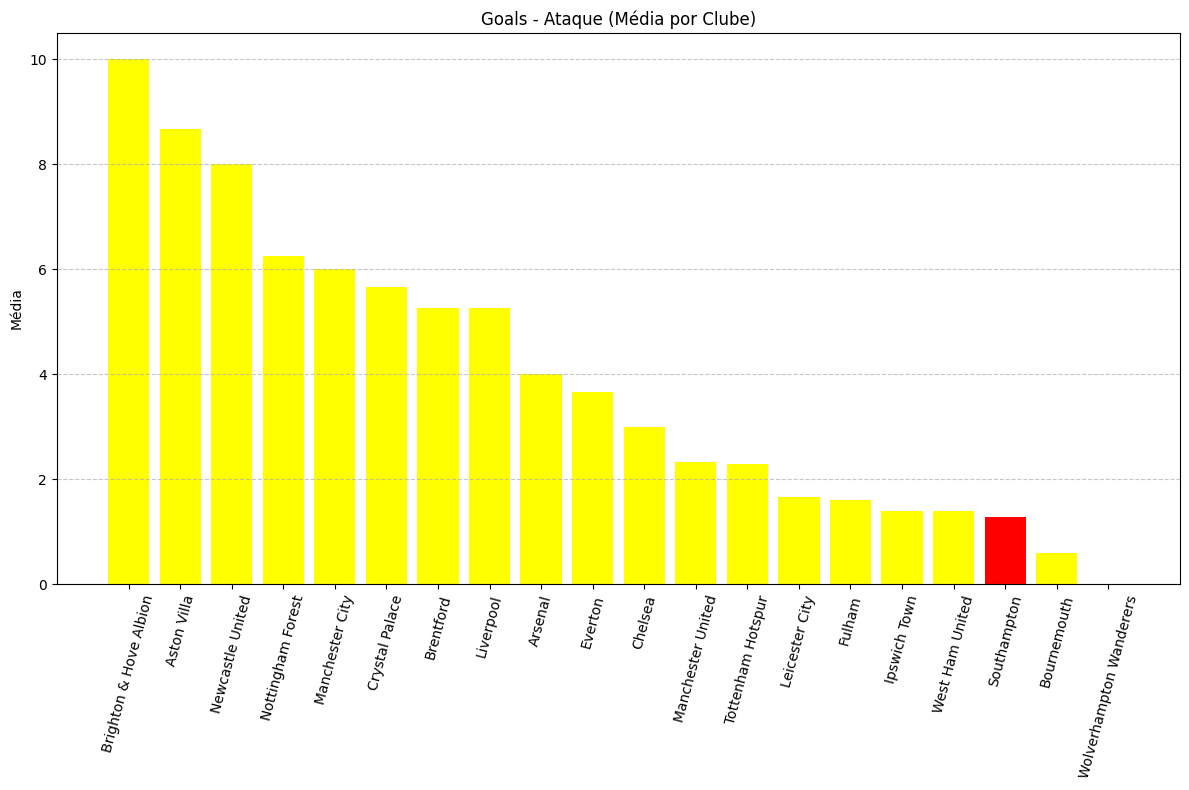

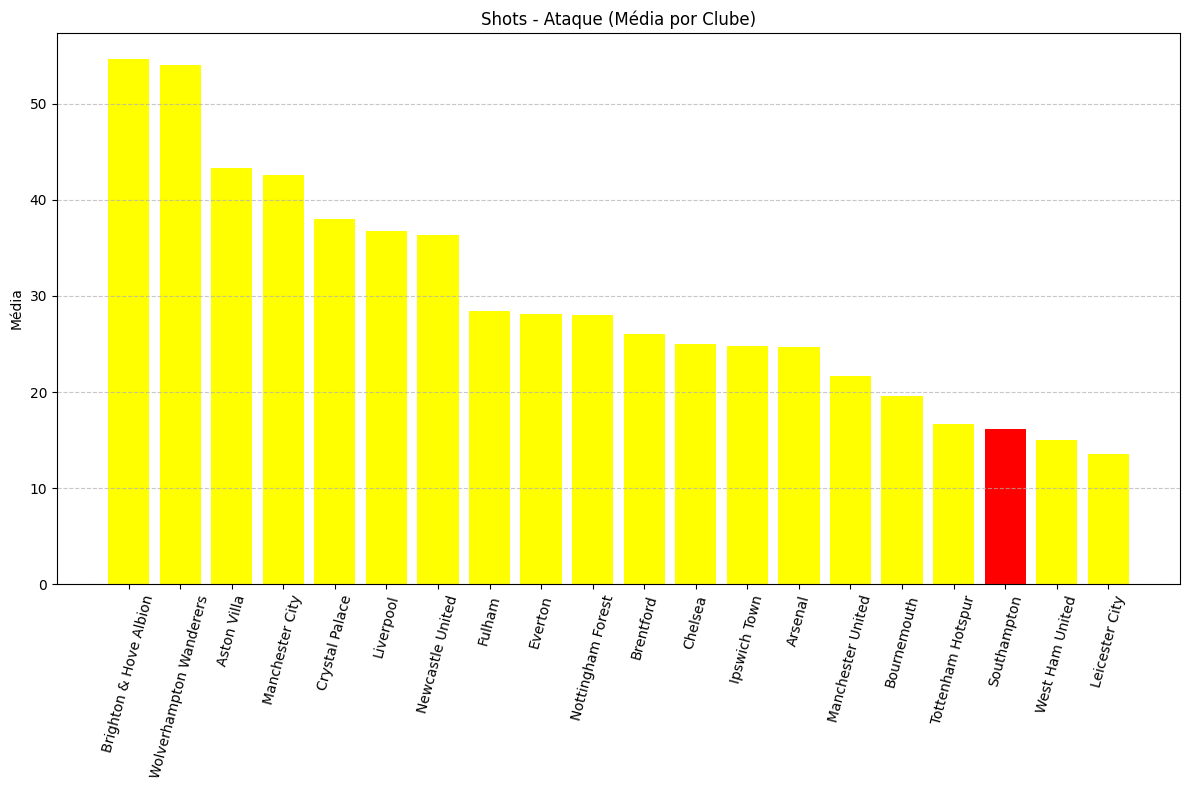

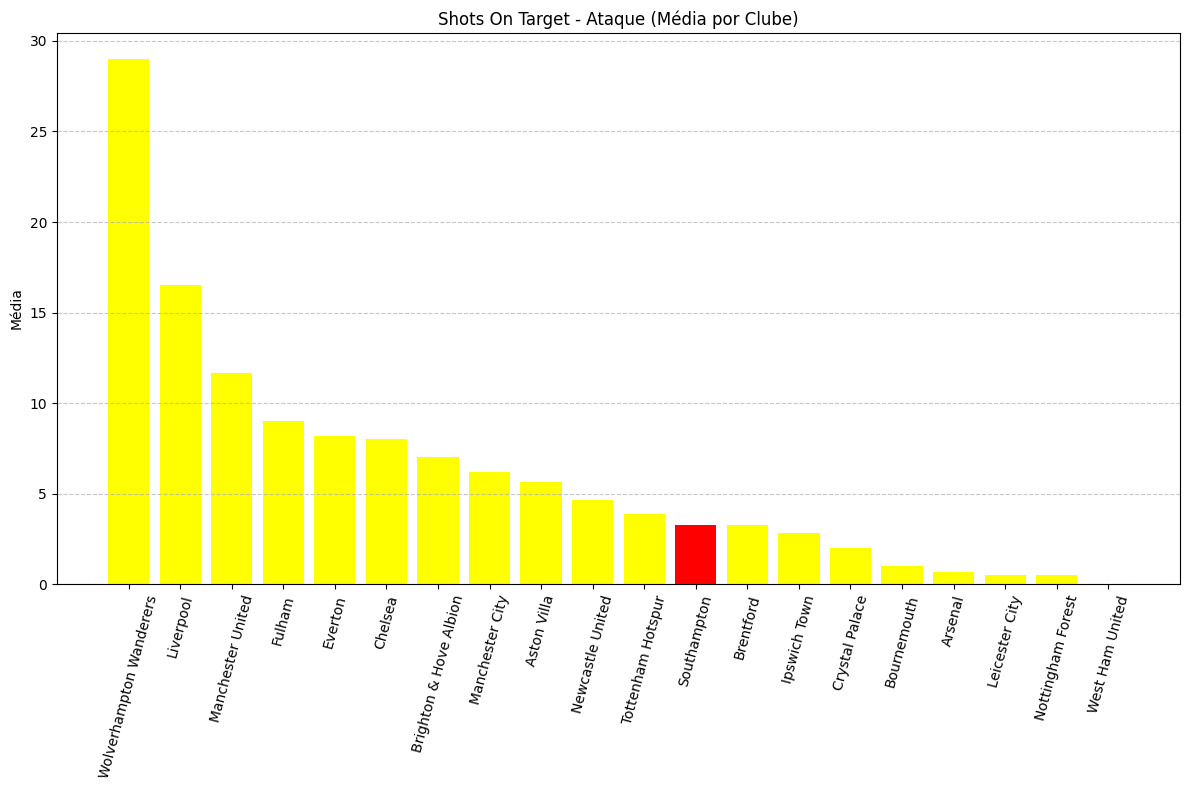

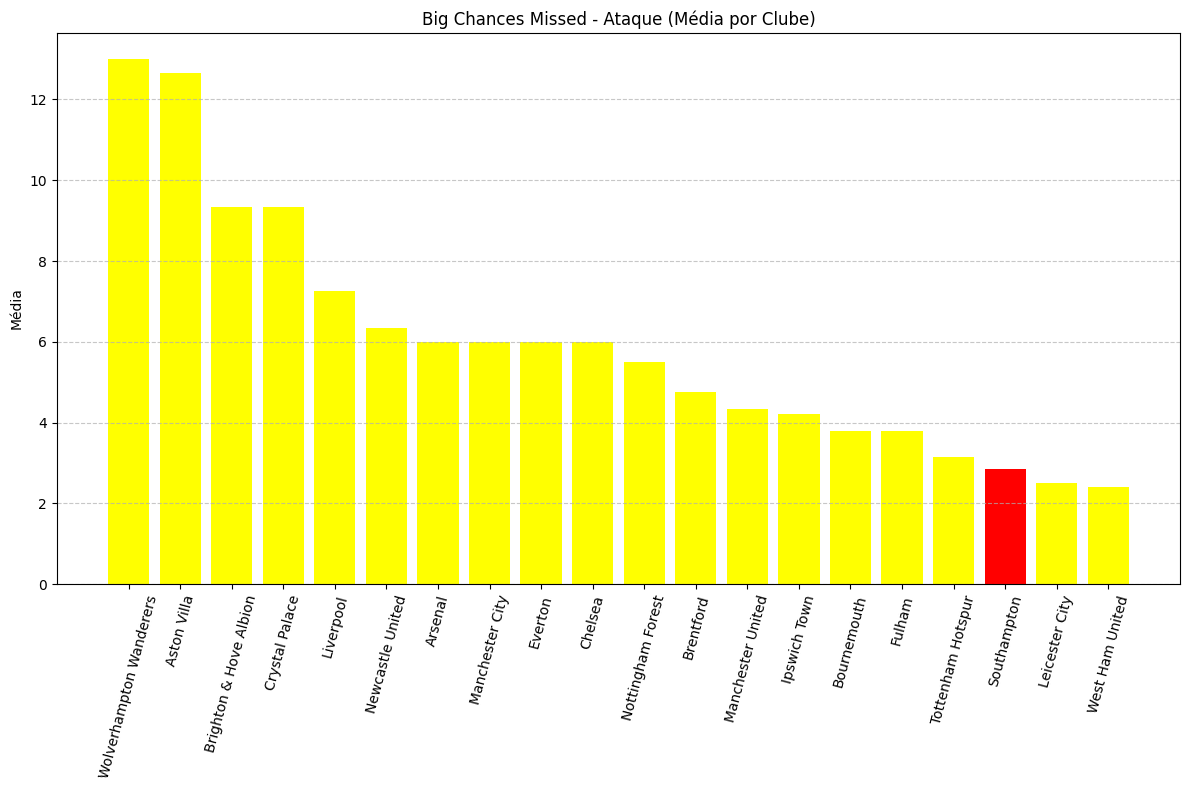

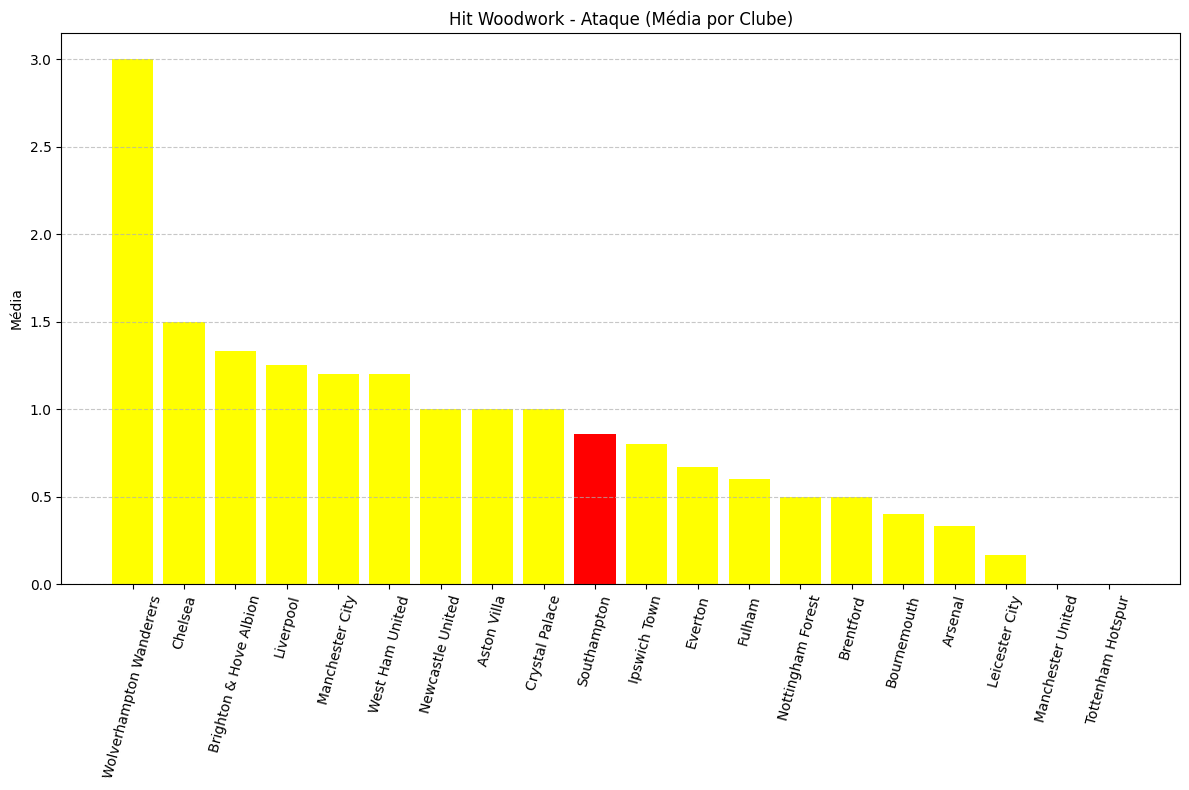

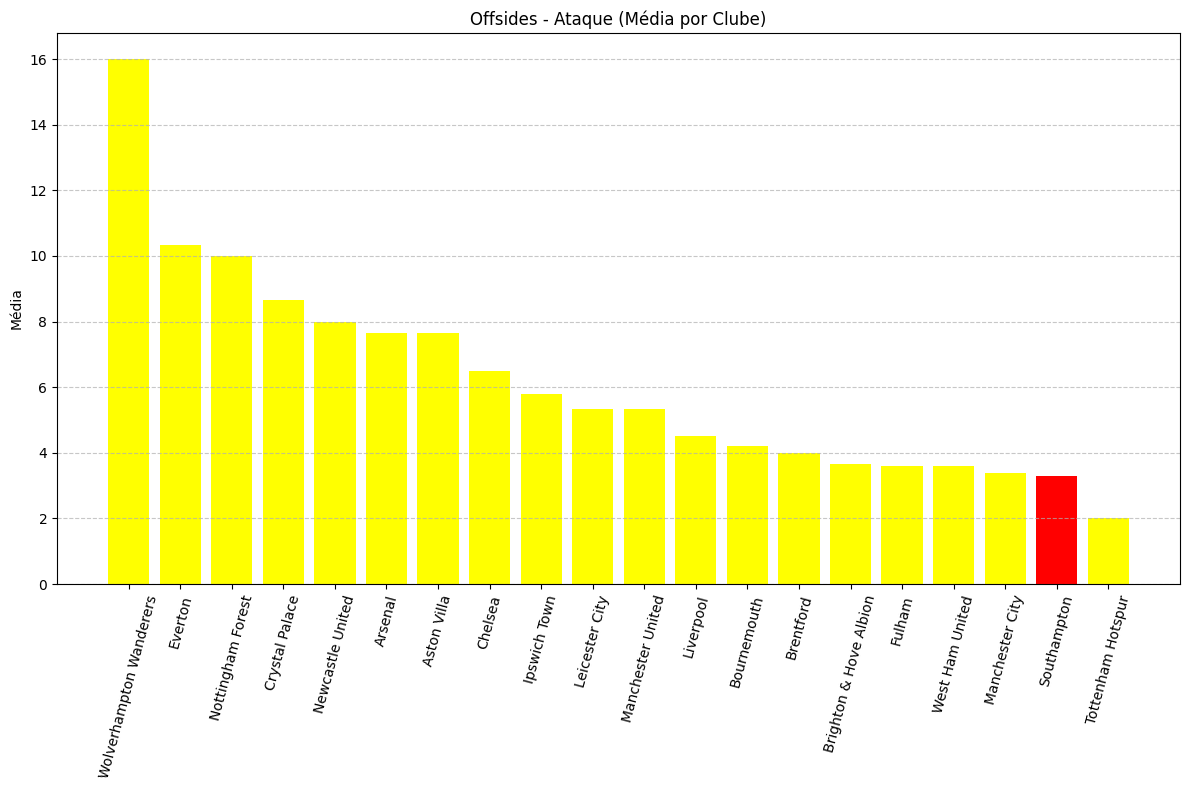

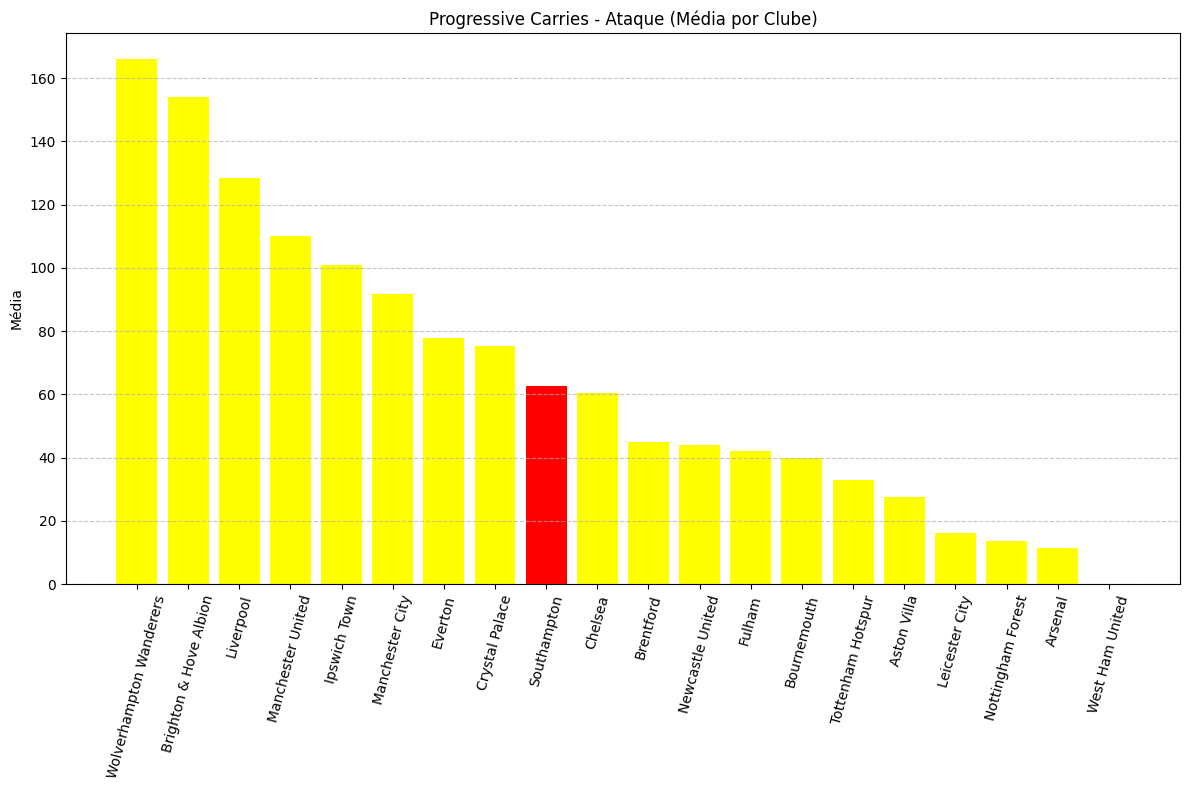

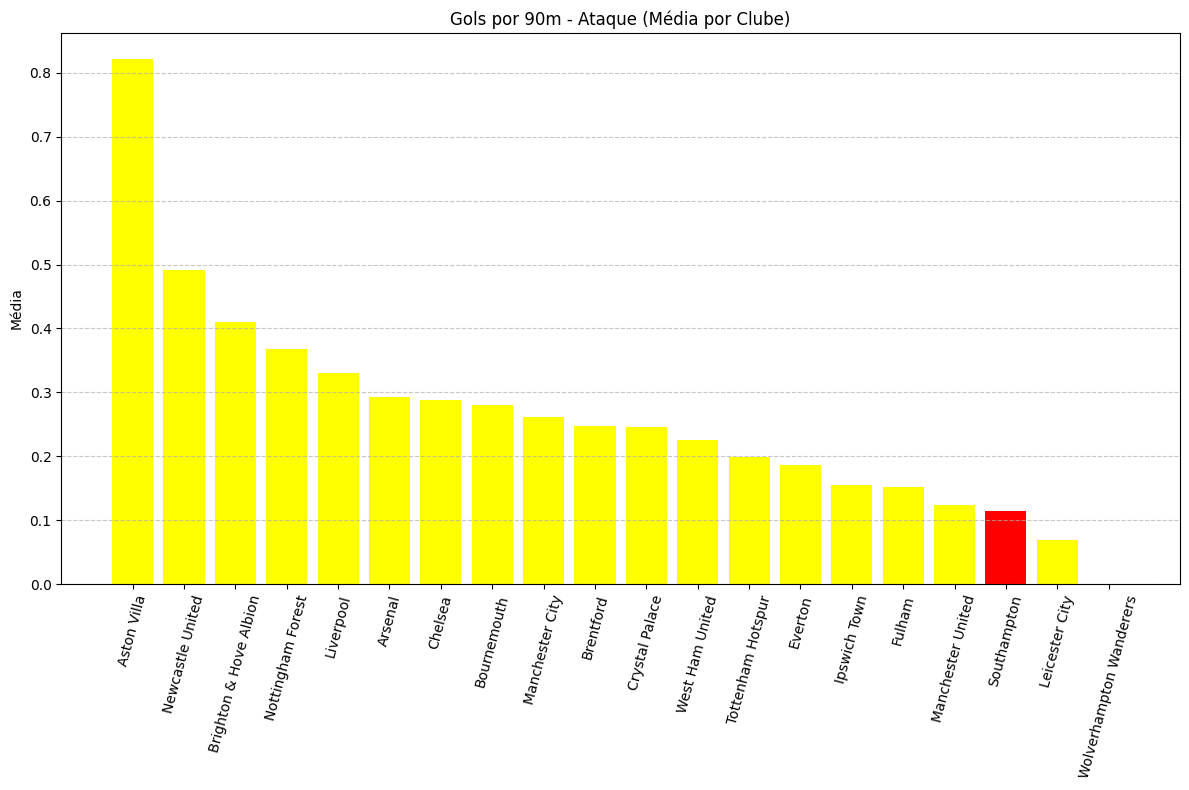

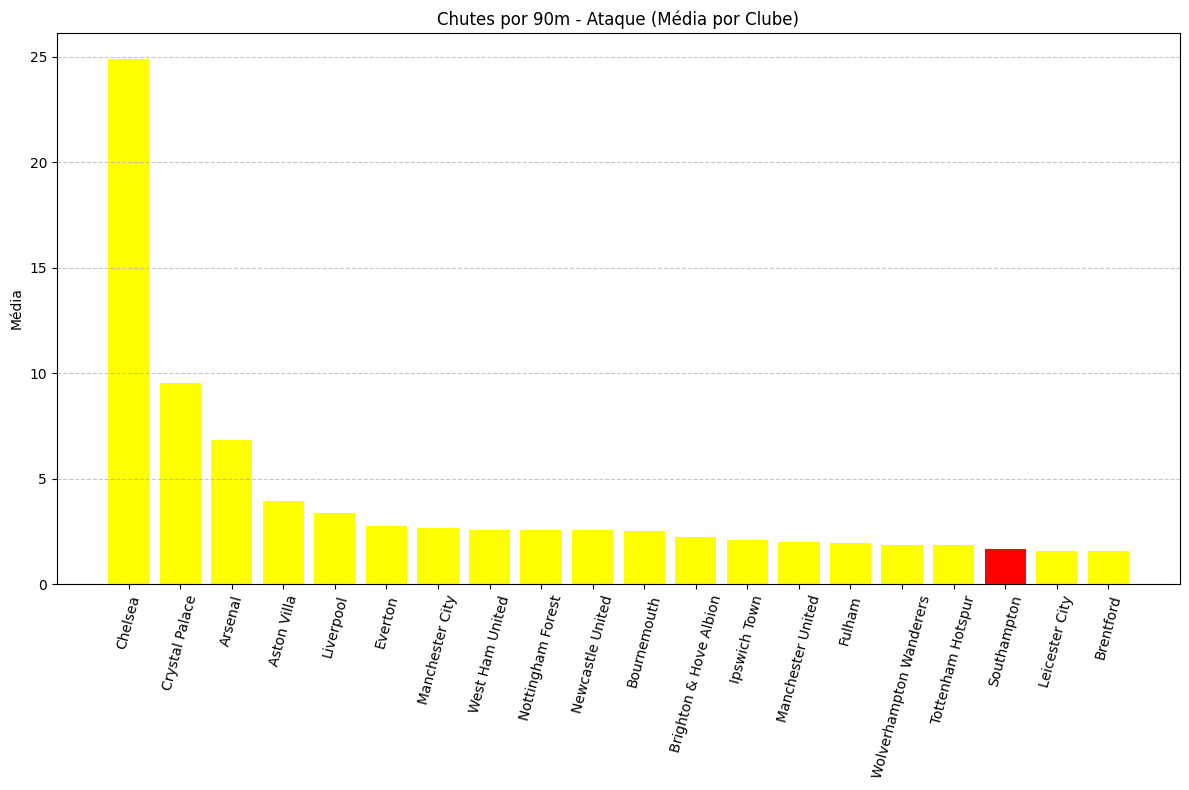

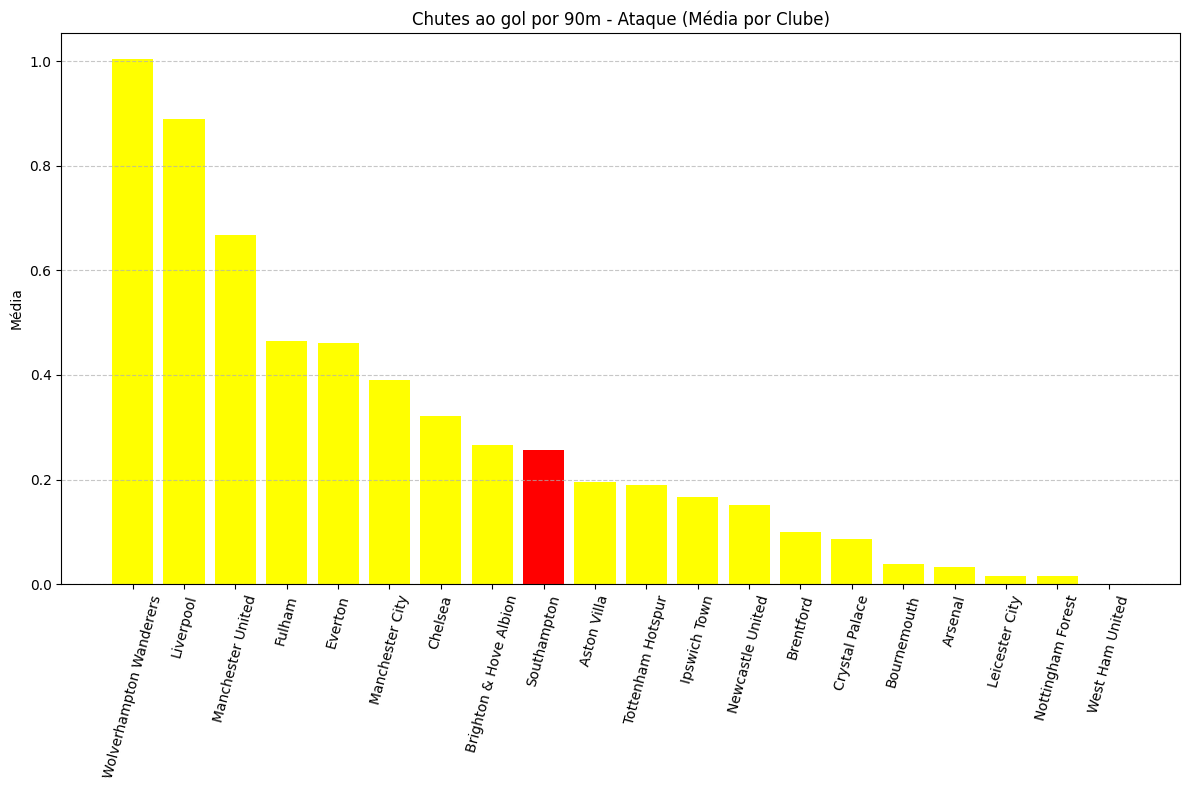

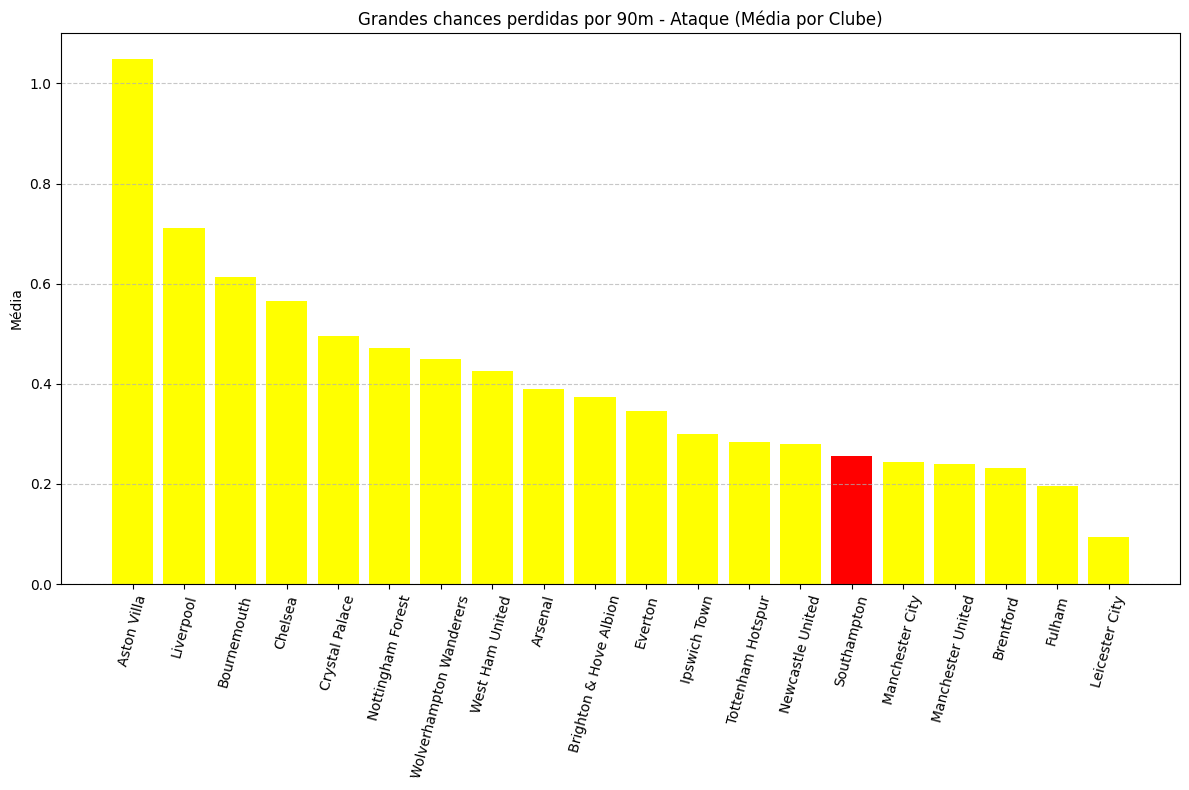

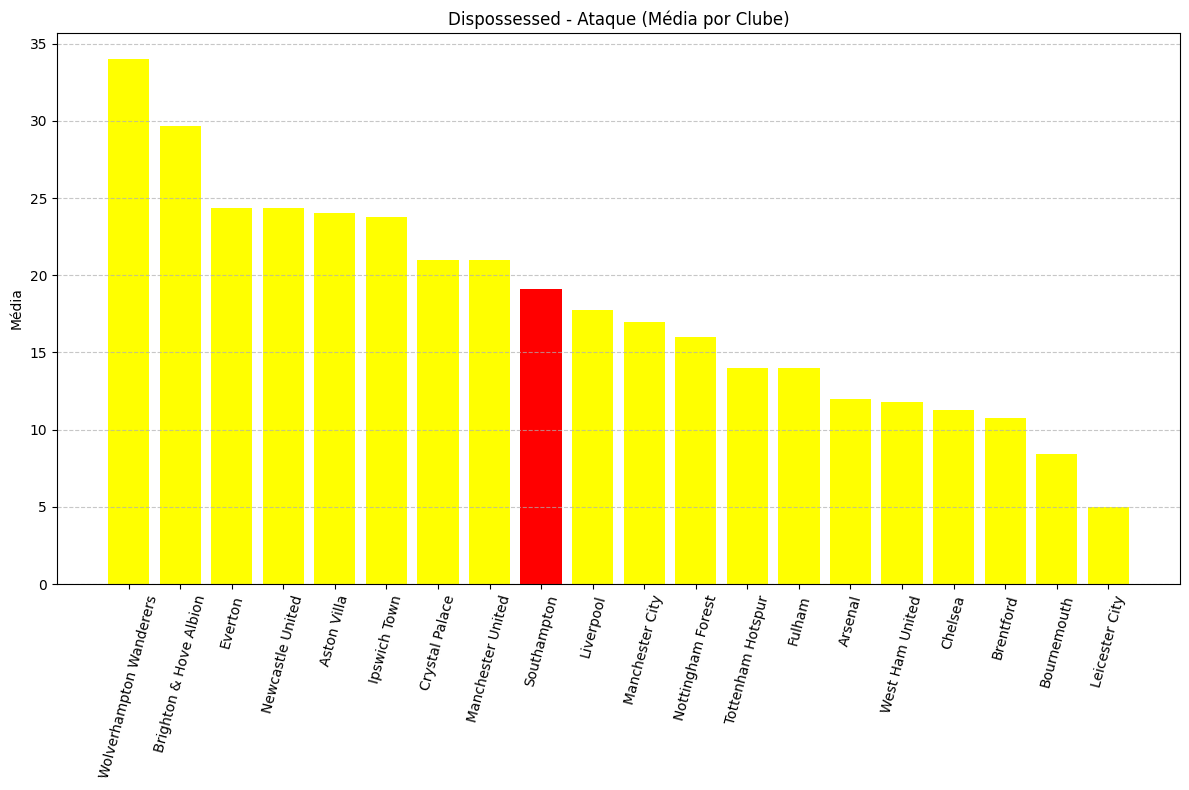

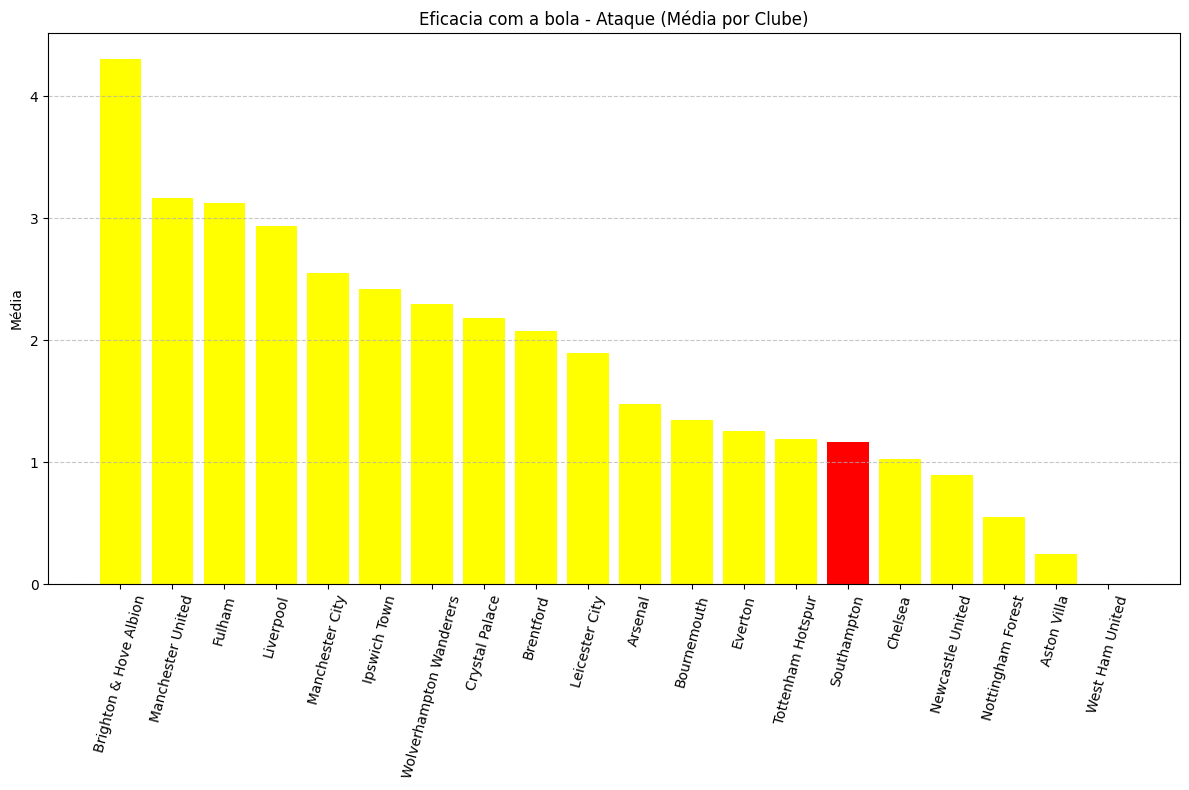

In [21]:
# gráfico com informações do ataque
def dados_atacantes_em_grafico(df, metricas=None):

    #removendo a duplicada do brighton
    #df = df[df['Club'] != 'Brighton']
    
    colunas_percentuais = ['Conversion %', 'Crosses %', 'fThird Passes %']
        
        
        # Função para converter colunas percentuais
    def converter_percentual(df, col):
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce') / 100
        return df

    # Aplica conversão
    for col in colunas_percentuais:
        df = converter_percentual(df, col)
    
    if metricas is None:
        metricas = [
            'Goals', 'Shots', 'Shots On Target',
            'Big Chances Missed', 'Hit Woodwork', 'Offsides', 'Progressive Carries',
            'Gols por 90m', 'Chutes por 90m', 'Chutes ao gol por 90m', 'Grandes chances perdidas por 90m'
            , 'Dispossessed', 'Eficacia com a bola'
        ]
        
            
        
    # Filtrando apenas meias
    atacantes = df[df['Position'] == 'FWD'].copy()
    
    # Verifica se Southampton está presente
    if 'Southampton' not in atacantes['Club'].values:
        print("Aviso: Southampton não encontrado nos dados de Atacantes.")
        print("Clubes disponíveis:", meias['Club'].unique())

    # Garantindo que as métricas sejam numéricas
    for metrica in metricas:
        atacantes[metrica] = pd.to_numeric(atacantes[metrica], errors='coerce')

    # Agrupando por clube e tirando a média das métricas
    media_ataque = atacantes.groupby("Club")[metricas].mean()
    

    # Gerando os gráficos
    for metrica in metricas:
        plt.figure(figsize=(12, 8))
        clubes_agrupados = media_ataque[metrica].sort_values(ascending=False)
        
        # Cor diferente para Southampton
        cor_southampton = ['red' if clube == 'Southampton' else 'yellow' for clube in clubes_agrupados.index]
        
        plt.bar(clubes_agrupados.index, clubes_agrupados.values, color=cor_southampton)
        plt.title(f"{metrica} - Ataque (Média por Clube)")
        plt.xticks(rotation=75)
        plt.ylabel("Média")
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Call the function
dados_atacantes_em_grafico(df)
